In [239]:
# CAN WE IMPROVE THE PREDICTION OF CO2 EMISSIONS 
# FROM DIFFERENT MODELS OF AUTOMOBILES 
# BY IDENTIFYING THE KEY FEATURES/VARIABLES OF THE DATASET 
# THAT CONTRIBUTE TO CO2  EMISSIONS 
# WITH CLEAR, EFFECTIVE AND EFFICIENT VISUALISATIONS USING PYTHON JUPITER NOTEBOOK?  


# Importing the necessary libraries.

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore") 

In [241]:
# Writing dataset into dataframe

df = pd.read_csv("CO2 Emissions_Canada.csv")

In [242]:
# Data Exploration first ten rows. 

df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [243]:
# Last ten rows in the dataset.

df.tail(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7375,VOLVO,S90 T6 AWD,MID-SIZE,2.0,4,AS8,Z,11.3,7.5,9.6,29,223
7376,VOLVO,V60 T5,STATION WAGON - SMALL,2.0,4,AS8,Z,10.5,7.1,8.9,32,208
7377,VOLVO,V60 T6 AWD,STATION WAGON - SMALL,2.0,4,AS8,Z,11.0,7.4,9.4,30,219
7378,VOLVO,V60 CC T5 AWD,STATION WAGON - SMALL,2.0,4,AS8,Z,10.8,7.7,9.4,30,220
7379,VOLVO,XC40 T4 AWD,SUV - SMALL,2.0,4,AS8,X,10.2,7.5,9.0,31,210
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [244]:
# Basic dataset information. Float, Object and integer values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [245]:
# Checking for null values. No null/missing values.

df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [246]:
# Checking for duplicates and dropping them.


df = df.drop_duplicates()
df.shape

(6282, 12)

In [264]:
df2 = df.drop_duplicates()
print("After dropping duplicate columns:\n", df2)

After dropping duplicate columns:
        make        model   vehicle_class  engine_size  cylinders transmission  \
0     ACURA          ILX         COMPACT          2.0          4          AS5   
1     ACURA          ILX         COMPACT          2.4          4           M6   
2     ACURA   ILX HYBRID         COMPACT          1.5          4          AV7   
3     ACURA      MDX 4WD     SUV - SMALL          3.5          6          AS6   
4     ACURA      RDX AWD     SUV - SMALL          3.5          6          AS6   
...     ...          ...             ...          ...        ...          ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL          2.0          4          AS8   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL          2.0          4          AS8   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL          2.0          4          AS8   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD          2.0          4          AS8   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD          2.0          4          

In [247]:
#number of distinct observations per group for each column'
df.nunique()

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

In [248]:
# Summary statistics of dataset with T referring to transpose.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),6282.0,3.161812,1.365201,0.9,2.0,3.0,3.7,8.4
Cylinders,6282.0,5.618911,1.846250,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),6282.0,12.610220,3.553066,4.2,10.1,12.1,14.7,30.6
Fuel Consumption Hwy (L/100 km),6282.0,9.070583,2.278884,4.0,7.5,8.7,10.3,20.6
Fuel Consumption Comb (L/100 km),6282.0,11.017876,2.946876,4.1,8.9,10.6,12.7,26.1
Fuel Consumption Comb (mpg),6282.0,27.411016,7.245318,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),6282.0,251.157752,59.290426,96.0,208.0,246.0,289.0,522.0


In [249]:
# Changing the column heads and makes them useful for the future

renamed_columns = {
    'Make' : "make",
    'Model' : 'model',
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Cylinders': 'cylinders',
    'Transmission' : 'transmission',
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2' }
df.rename(renamed_columns, axis='columns', inplace=True)

In [250]:
# Visualising the new column heads.

df_new = df.copy()

In [251]:
df.head(2)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


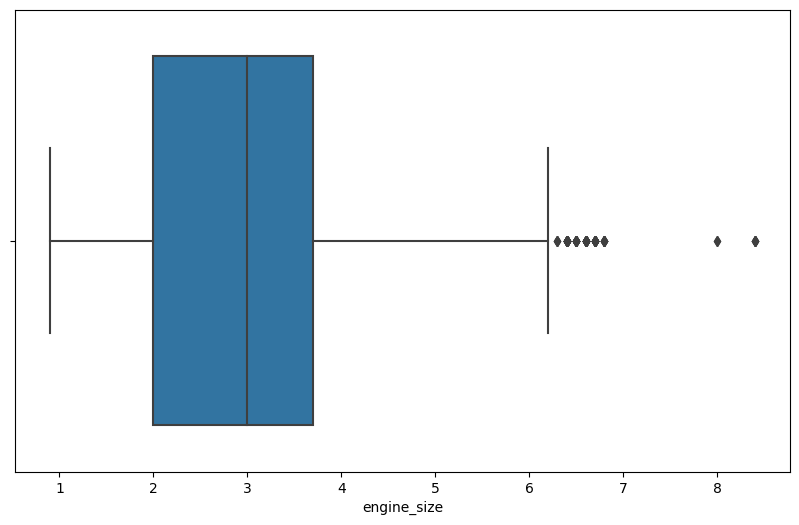

In [78]:
# Create a box plot for engine size to check for outliers.

sns.boxplot(x=df['engine_size'])
plt.show()

In [252]:
# Removing outliers from engine size

Q1 = df['engine_size'].quantile(0.25)
Q3 = df['engine_size'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

In [253]:
df_no_outliers = df[(df['engine_size'] >= lower_bound) & (df['engine_size'] <= upper_bound)]

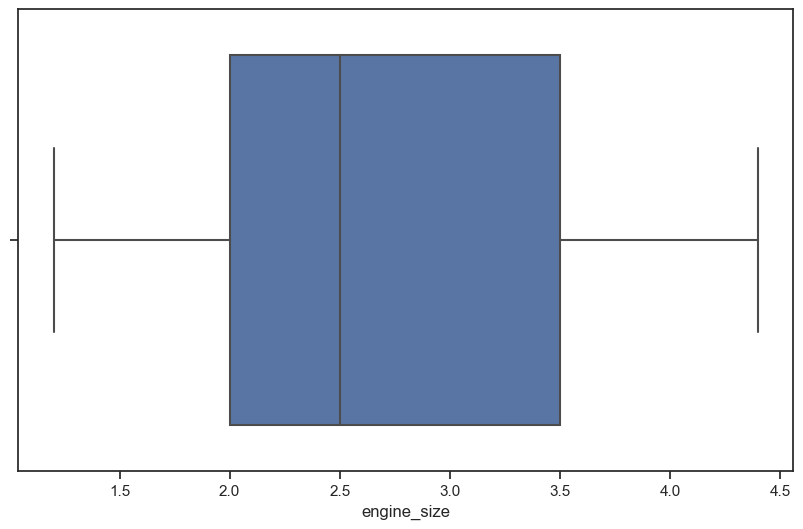

In [254]:
sns.boxplot(x=df_no_outliers['engine_size'])
plt.show()

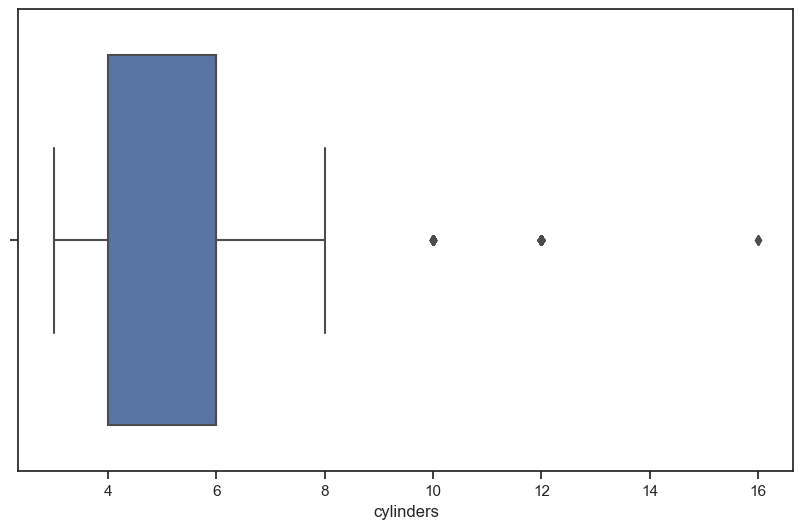

In [255]:
# Checking cylinders for outliers.

sns.boxplot(x=df['cylinders'])
plt.show()

In [256]:
# Removing outliers from cylinders.

Q1 = df['cylinders'].quantile(0.25)
Q3 = df['cylinders'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

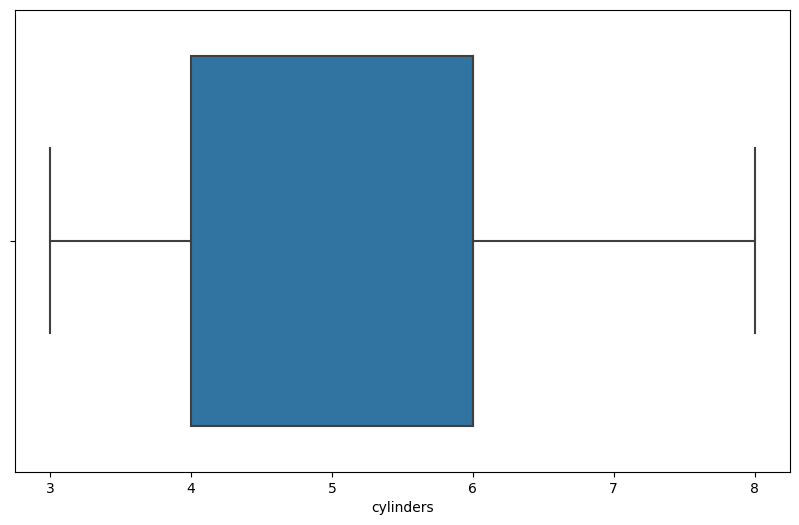

In [86]:
sns.boxplot(x=df_no_outliers['cylinders'])
plt.show()

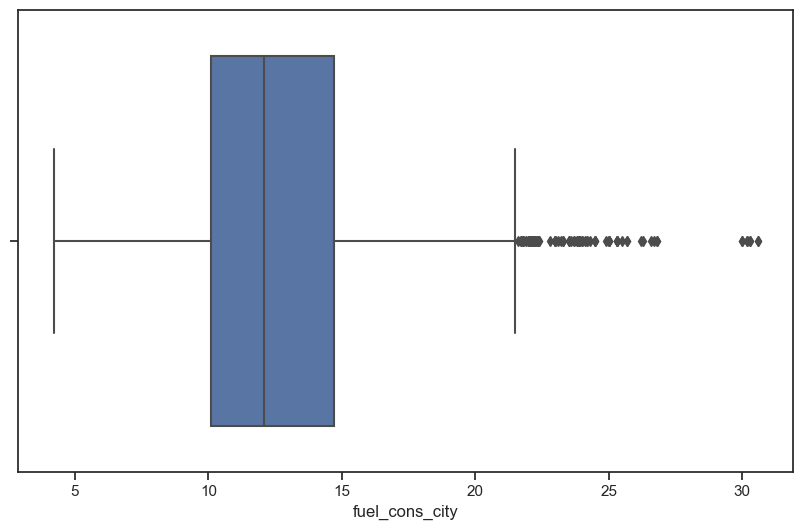

In [257]:
# Checking for outliers in Fuel Consumption City (L/100km)

sns.boxplot(x=df['fuel_cons_city'])
plt.show()

In [258]:
# Removing outliers in Fuel Consumption City (L/100km). These may likely be genuine extreem values.

Q1 = df['fuel_cons_city'].quantile(0.25)
Q3 = df['fuel_cons_city'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

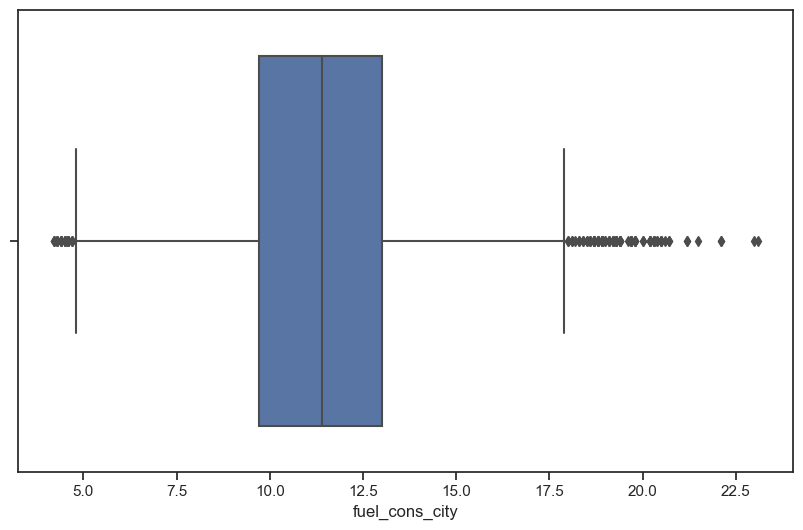

In [259]:
sns.boxplot(x=df_no_outliers['fuel_cons_city'])
plt.show()

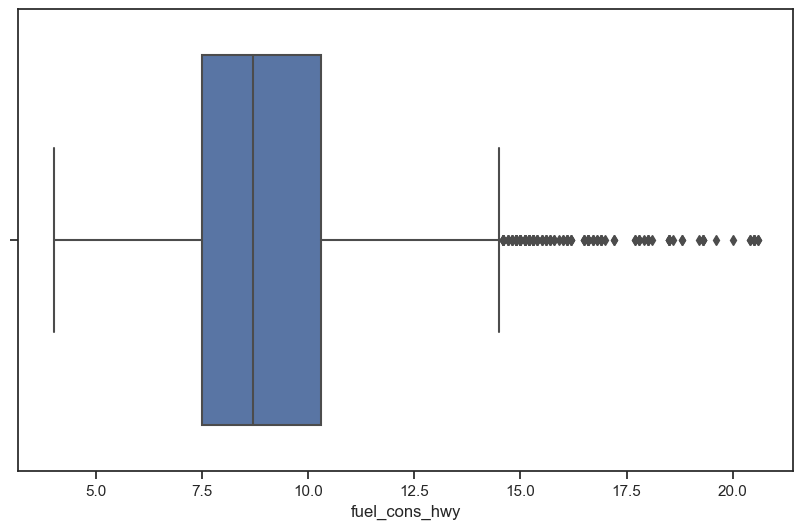

In [260]:
# Checking for outliers in fuel consumption for highway. 

sns.boxplot(x=df['fuel_cons_hwy'])
plt.show()

In [261]:
Q1 = df['fuel_cons_hwy'].quantile(0.25)
Q3 = df['fuel_cons_hwy'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

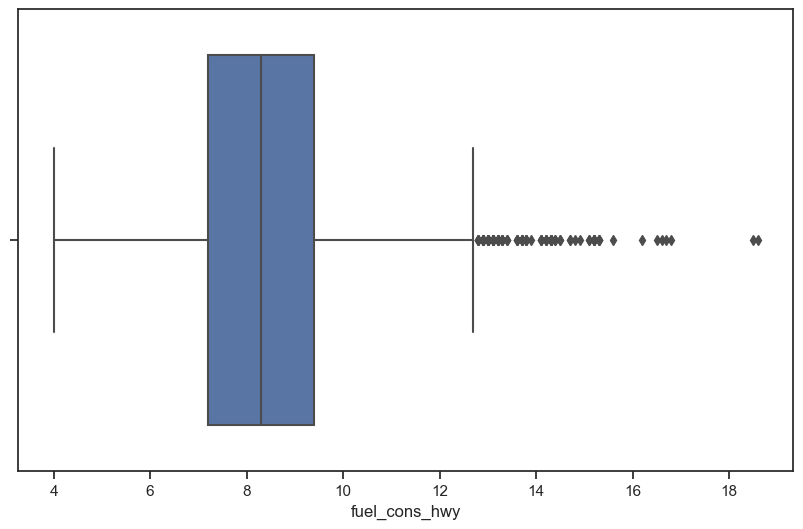

In [263]:
sns.boxplot(x=df_no_outliers['fuel_cons_hwy'])
plt.show()

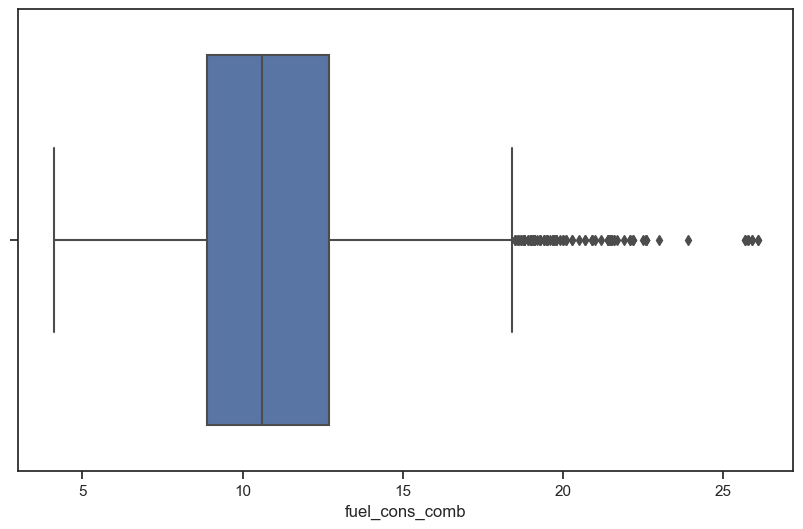

In [262]:
# Checking for outliers in fuel consumption comb.

sns.boxplot(x=df['fuel_cons_comb'])
plt.show()

In [117]:
# Trying to remove outliers.

Q1 = df['fuel_cons_comb'].quantile(0.25)
Q3 = df['fuel_cons_comb'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

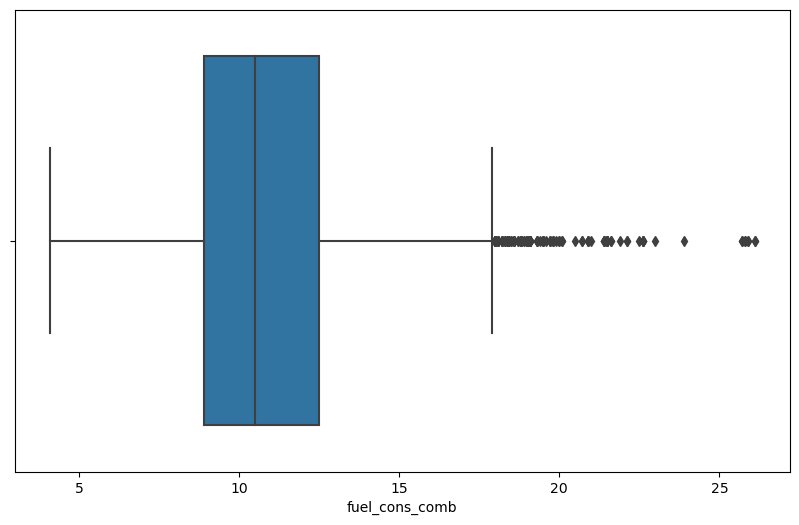

In [118]:
sns.boxplot(x=df_no_outliers['fuel_cons_comb'])
plt.show()

<Axes: xlabel='cylinders', ylabel='engine_size'>

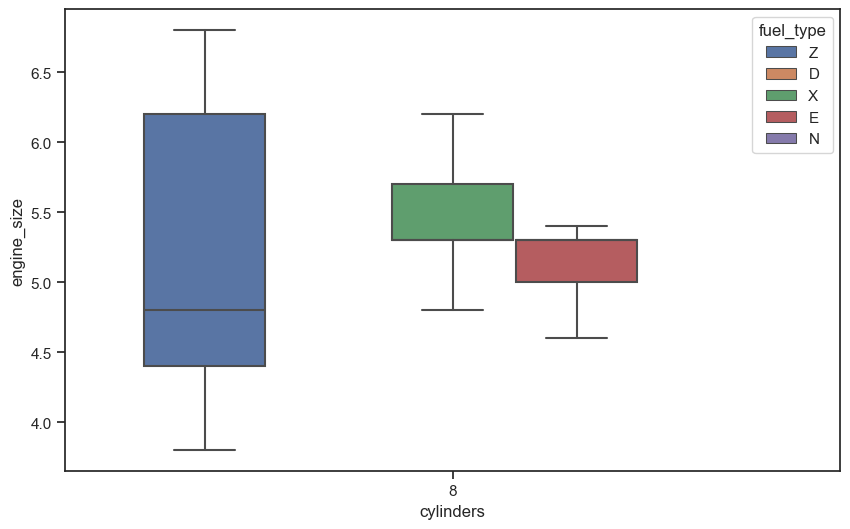

In [267]:
from scipy import stats
# Assuming our DataFrame is named df2
var = 'cylinders'
try_var = df2[df2[var]==8][var]
threshold = 5.5

# Create a copy of the DataFrame to avoid modifying the original data
df_copy = df2.copy()

# Filter rows where Fuel Type is 'E'
fuel_type_e_rows = df_copy[df_copy['fuel_type'] == 'E']

# Calculate z-scores for the 'Engine Size(L)' column within Fuel Type 'E'
z_scores_e = stats.zscore(fuel_type_e_rows['engine_size'])

# Identify rows with z-scores beyond the threshold
outliers_mask = abs(z_scores_e) > threshold

# Remove outliers for Fuel Type 'E'
df_copy.loc[(df_copy['fuel_type'] == 'E') & (df_copy['engine_size'] > threshold), 'engine_size'] = None

threshold_x = 4.74

# Remove outliers for Fuel Type 'X'
df_copy.loc[(df_copy['fuel_type'] == 'X') & (df_copy['engine_size'] < threshold_x), 'engine_size'] = None

# Plot the boxplot without outliers
sns.boxplot(data=df_copy, y='engine_size', x=try_var, hue='fuel_type')

<Axes: xlabel='cylinders', ylabel='engine_size'>

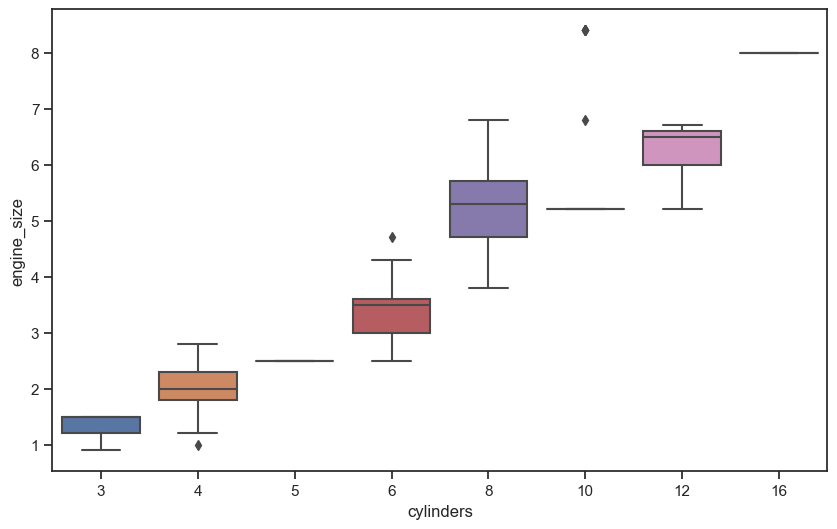

In [268]:
var = 'cylinders'
sns.boxplot(data=df2, y='''engine_size''', x=var )

In [270]:
#Z-Score method
upper_limit = df2["fuel_cons_city"].mean() + 3*df2["fuel_cons_city"].std()
lower_limit = df2["fuel_cons_city"].mean() - 3*df2["fuel_cons_city"].std()

print(upper_limit,f'  ', lower_limit)

#df2.loc[(df2["Fuel Consumption City (L/100 km)"].where('Cylinders'==4))]

23.269418601242634    1.951020749282673


<Axes: xlabel='cylinders', ylabel='co2'>

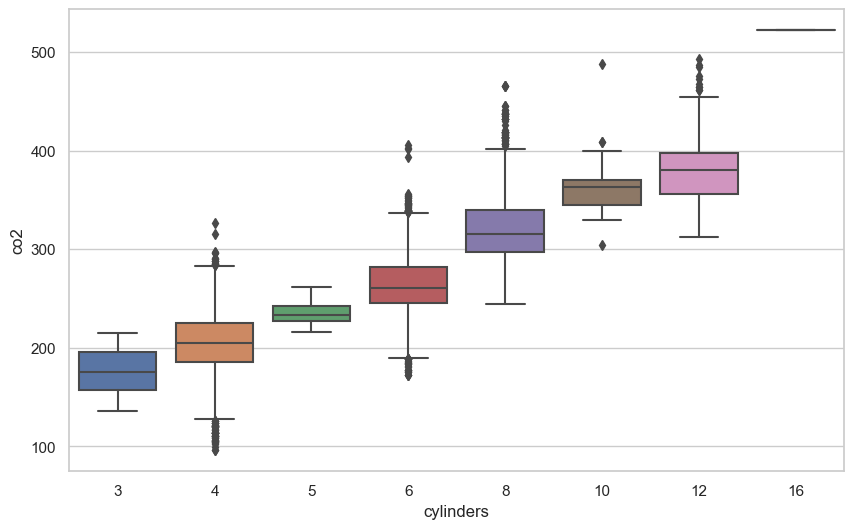

In [320]:
var = 'cylinders'
sns.boxplot(data=df2, y='''co2''', x=var )

<Axes: xlabel='cylinders', ylabel='co2'>

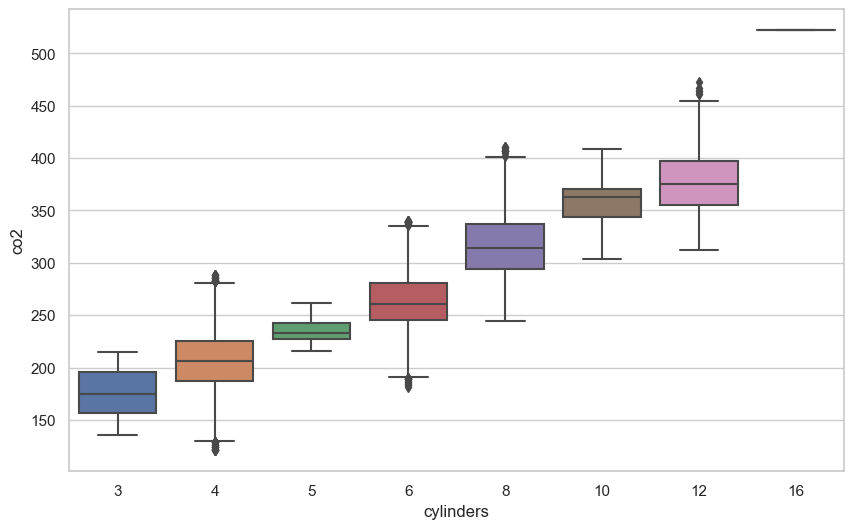

In [321]:
import numpy as np

# Assuming our DataFrame is named df4
var = 'cylinders'
threshold = 3  # We can adjust this threshold based on your requirements

# Create a copy of the DataFrame to avoid modifying the original data
df4_copy = df4.copy()

# Function to calculate modified z-score
def calculate_modified_zscore(series):
    median = series.median()
    median_absolute_deviation = np.median(np.abs(series - median))
    modified_zscores = 0.6745 * (series - median) / median_absolute_deviation
    return np.abs(modified_zscores)

# Apply modified z-score for each group of cylinders
outlier_mask = df4_copy.groupby(var)['co2'].transform(calculate_modified_zscore) > threshold

# Remove outliers
df4_copy.loc[outlier_mask, 'co2'] = None

# Plot the boxplot without outliers
sns.boxplot(data=df4_copy, y='co2', x=var)

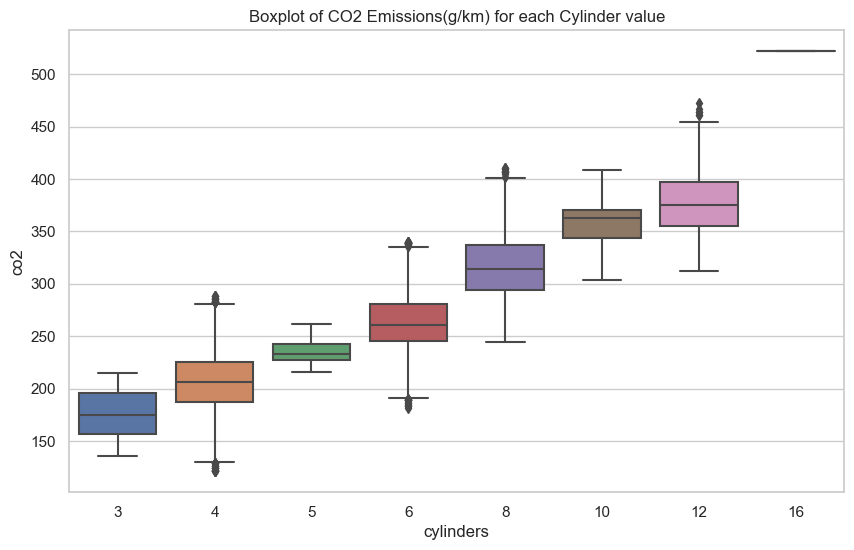

In [322]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df4_copy
var = 'cylinders'

# Create a boxplot to visualize the remaining outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df4_copy, y='co2', x=var)
plt.title('Boxplot of CO2 Emissions(g/km) for each Cylinder value')
plt.show()

<Axes: xlabel='co2', ylabel='Count'>

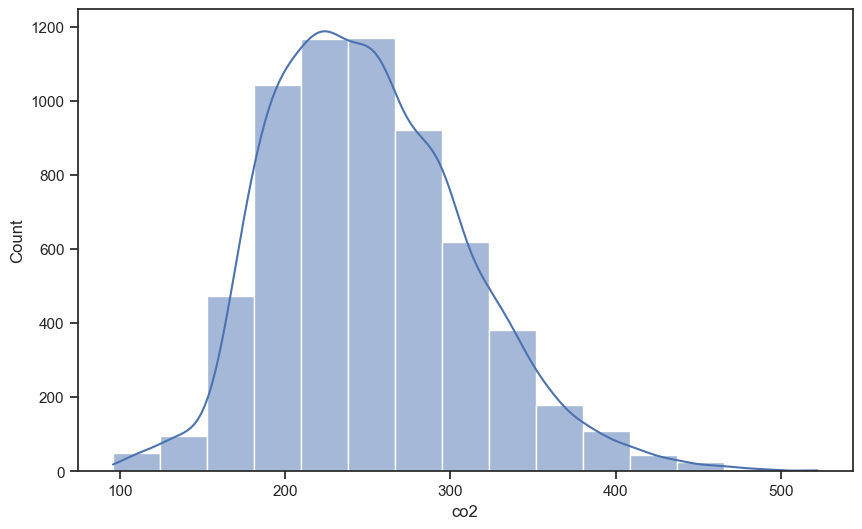

In [285]:
sns.histplot(df2["co2"], kde=True, bins=15)

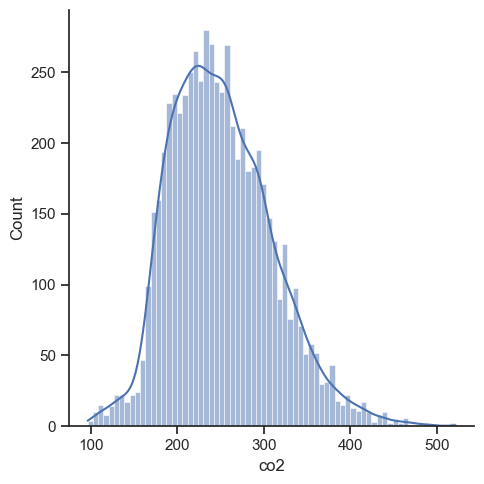

In [289]:
sns.displot(df2["co2"], kde=True, bins=70)

<Axes: >

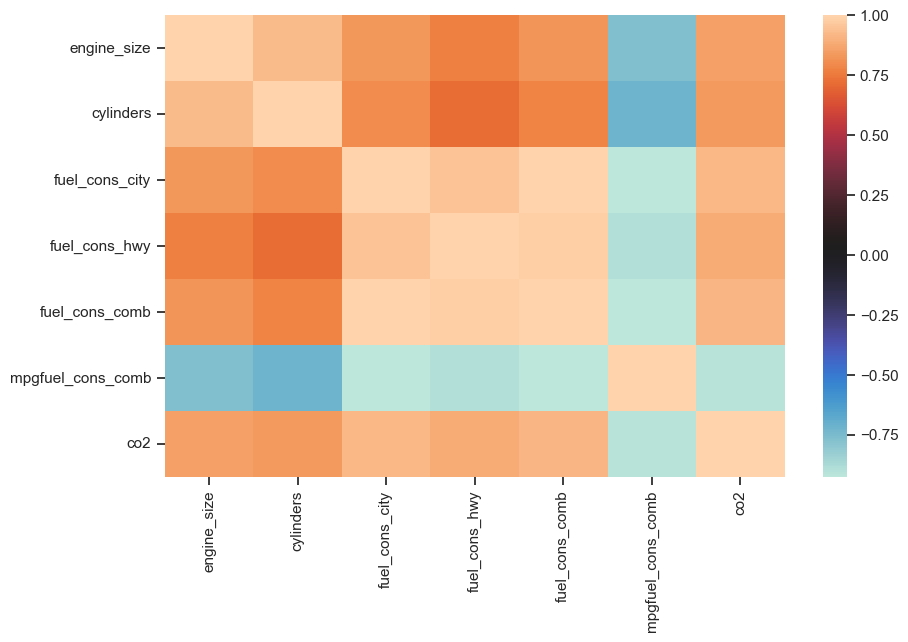

In [290]:
sns.heatmap(df2.corr(), cmap="icefire")

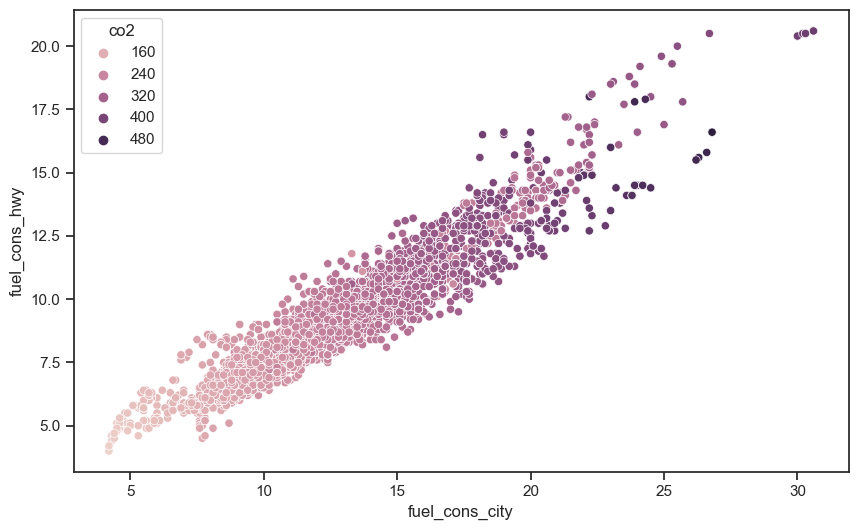

In [271]:
# Exploring the features of the dataset using scatterplots. 
# Positive correlation between fuel consumption city and fuel consumption highway with co2 as the target variable.

sns.scatterplot(x='fuel_cons_city', y='fuel_cons_hwy', hue='co2', data=df)
plt.show()

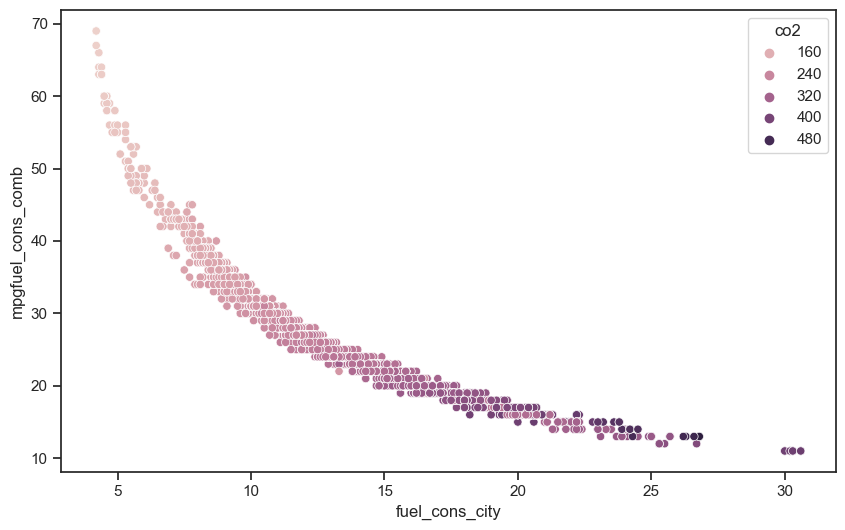

In [272]:
# Negative correlation between fuel consumption comb and mpg fuel consumption with co2 as the target variable.

sns.scatterplot(x='fuel_cons_city', y='mpgfuel_cons_comb', hue='co2', data=df)
plt.show()

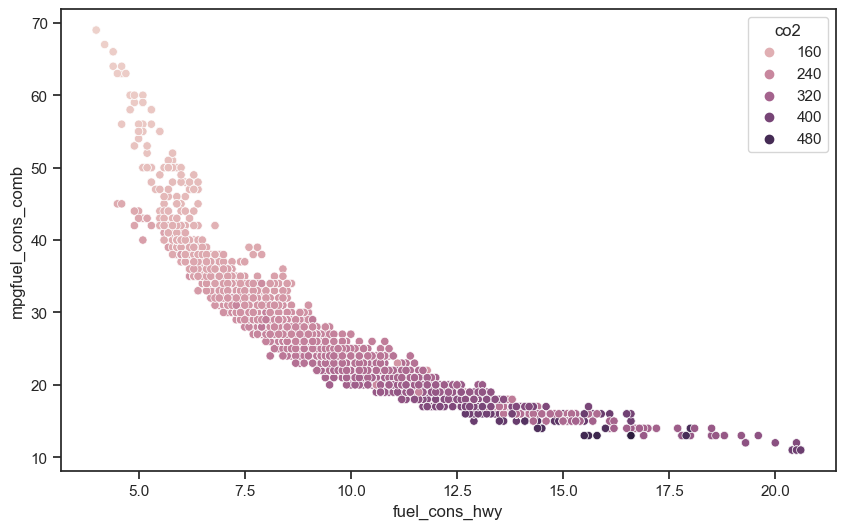

In [273]:
# Negative correlation between fuel consumption highway and mpg fuel consumption comb with co2 as the target variable.

sns.scatterplot(x='fuel_cons_hwy', y='mpgfuel_cons_comb', hue='co2', data=df)
plt.show()

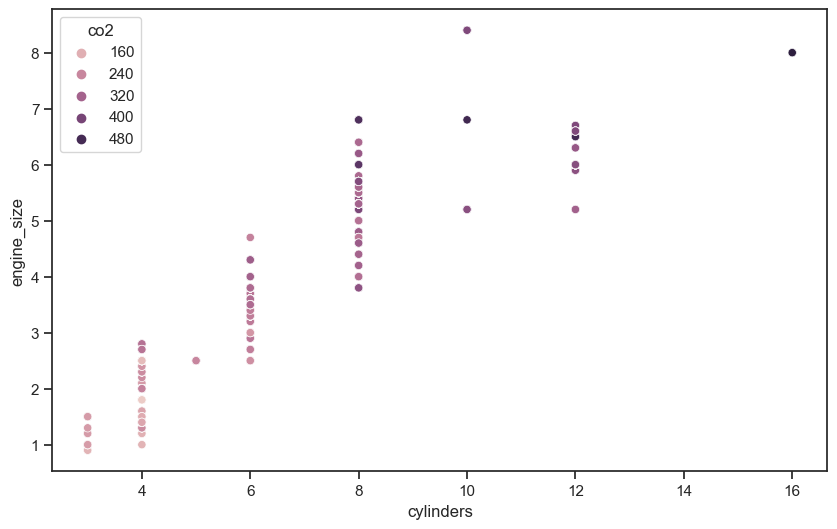

In [278]:
sns.scatterplot(x='cylinders', y='engine_size', hue='co2', data=df)
plt.show()

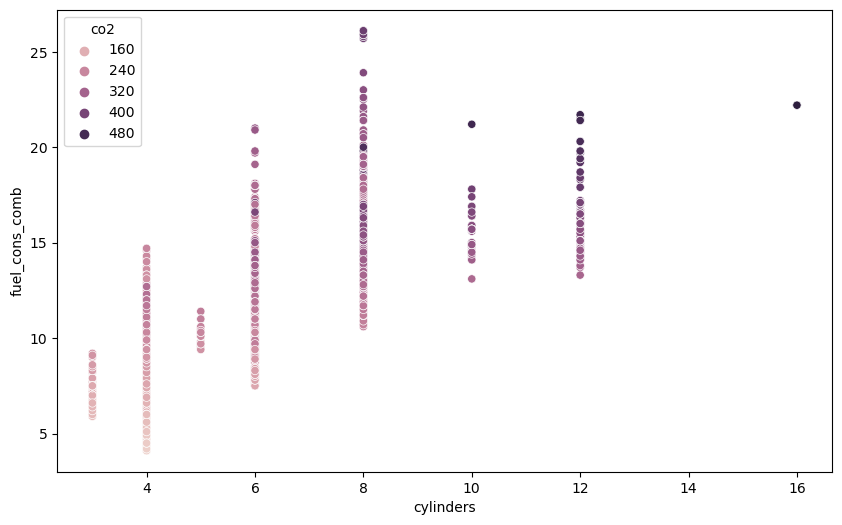

In [140]:
sns.scatterplot(x='cylinders', y='fuel_cons_comb', hue='co2', data=df)
plt.show()

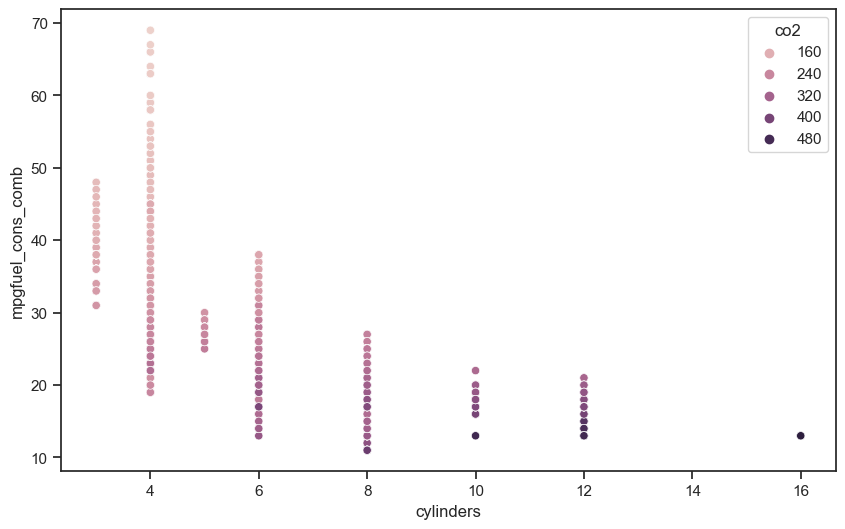

In [280]:
sns.scatterplot(x='cylinders', y='mpgfuel_cons_comb', hue='co2', data=df)
plt.show()

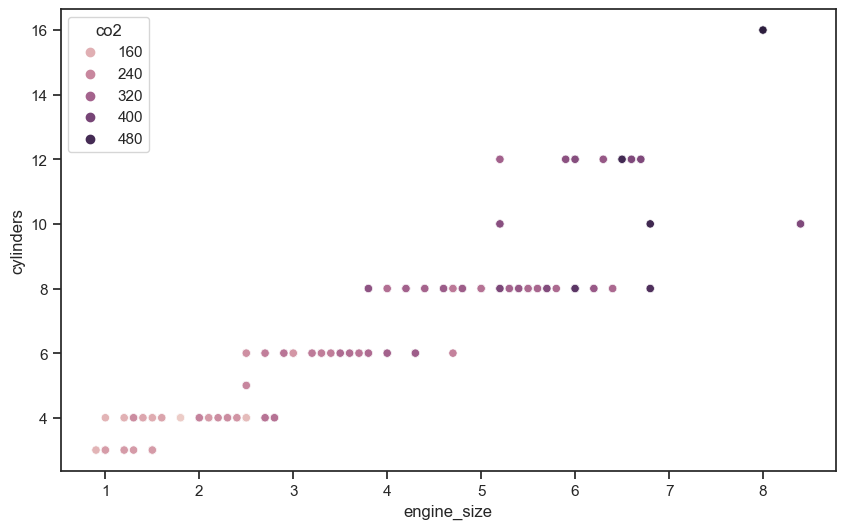

In [281]:
sns.scatterplot(x='engine_size', y='cylinders', hue='co2', data=df)
plt.show()

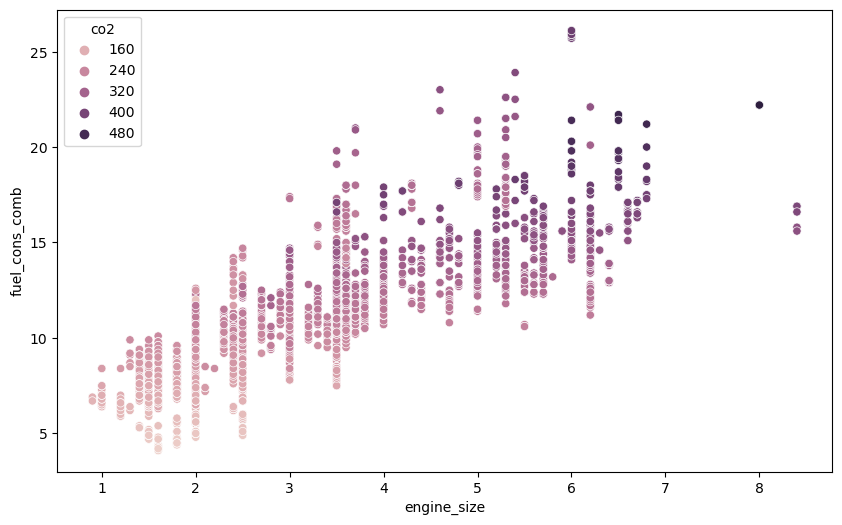

In [145]:
sns.scatterplot(x='engine_size', y='fuel_cons_comb', hue='co2', data=df)
plt.show()

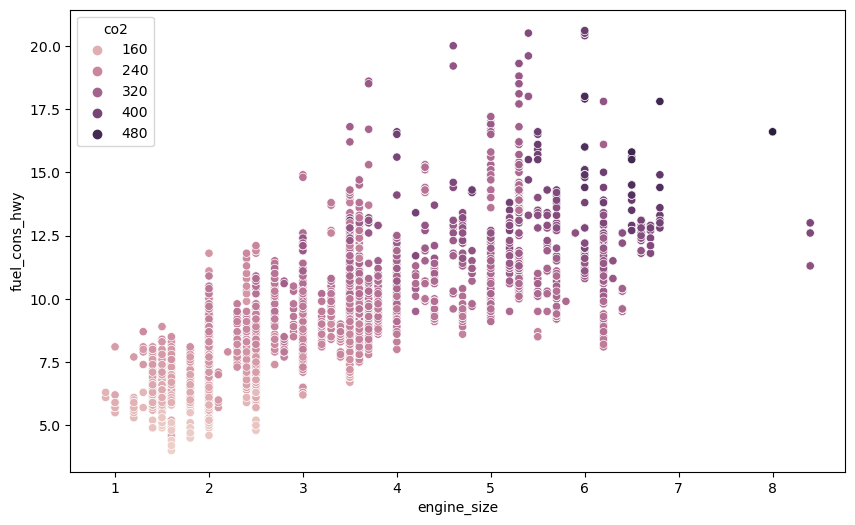

In [146]:
sns.scatterplot(x='engine_size', y='fuel_cons_hwy', hue='co2', data=df)
plt.show()

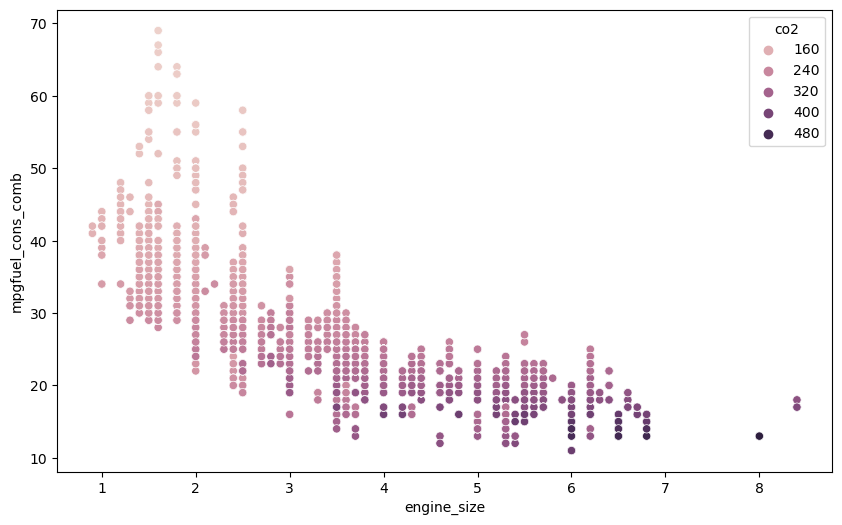

In [147]:
sns.scatterplot(x='engine_size', y='mpgfuel_cons_comb', hue='co2', data=df)
plt.show()

In [148]:
def explore_cat_feature(feature):
    group= df.groupby(feature).mean()
    plt.figure(figsize=[20,10])
    plots = group['co2'].sort_values().plot(kind = 'bar', fontsize=20)
    plt.xlabel(feature, fontsize=20);
    plt.ylabel('Mean co2', fontsize=20);
    plt.title("Mean co2 according to {} feature\n".format(feature), fontsize=30)

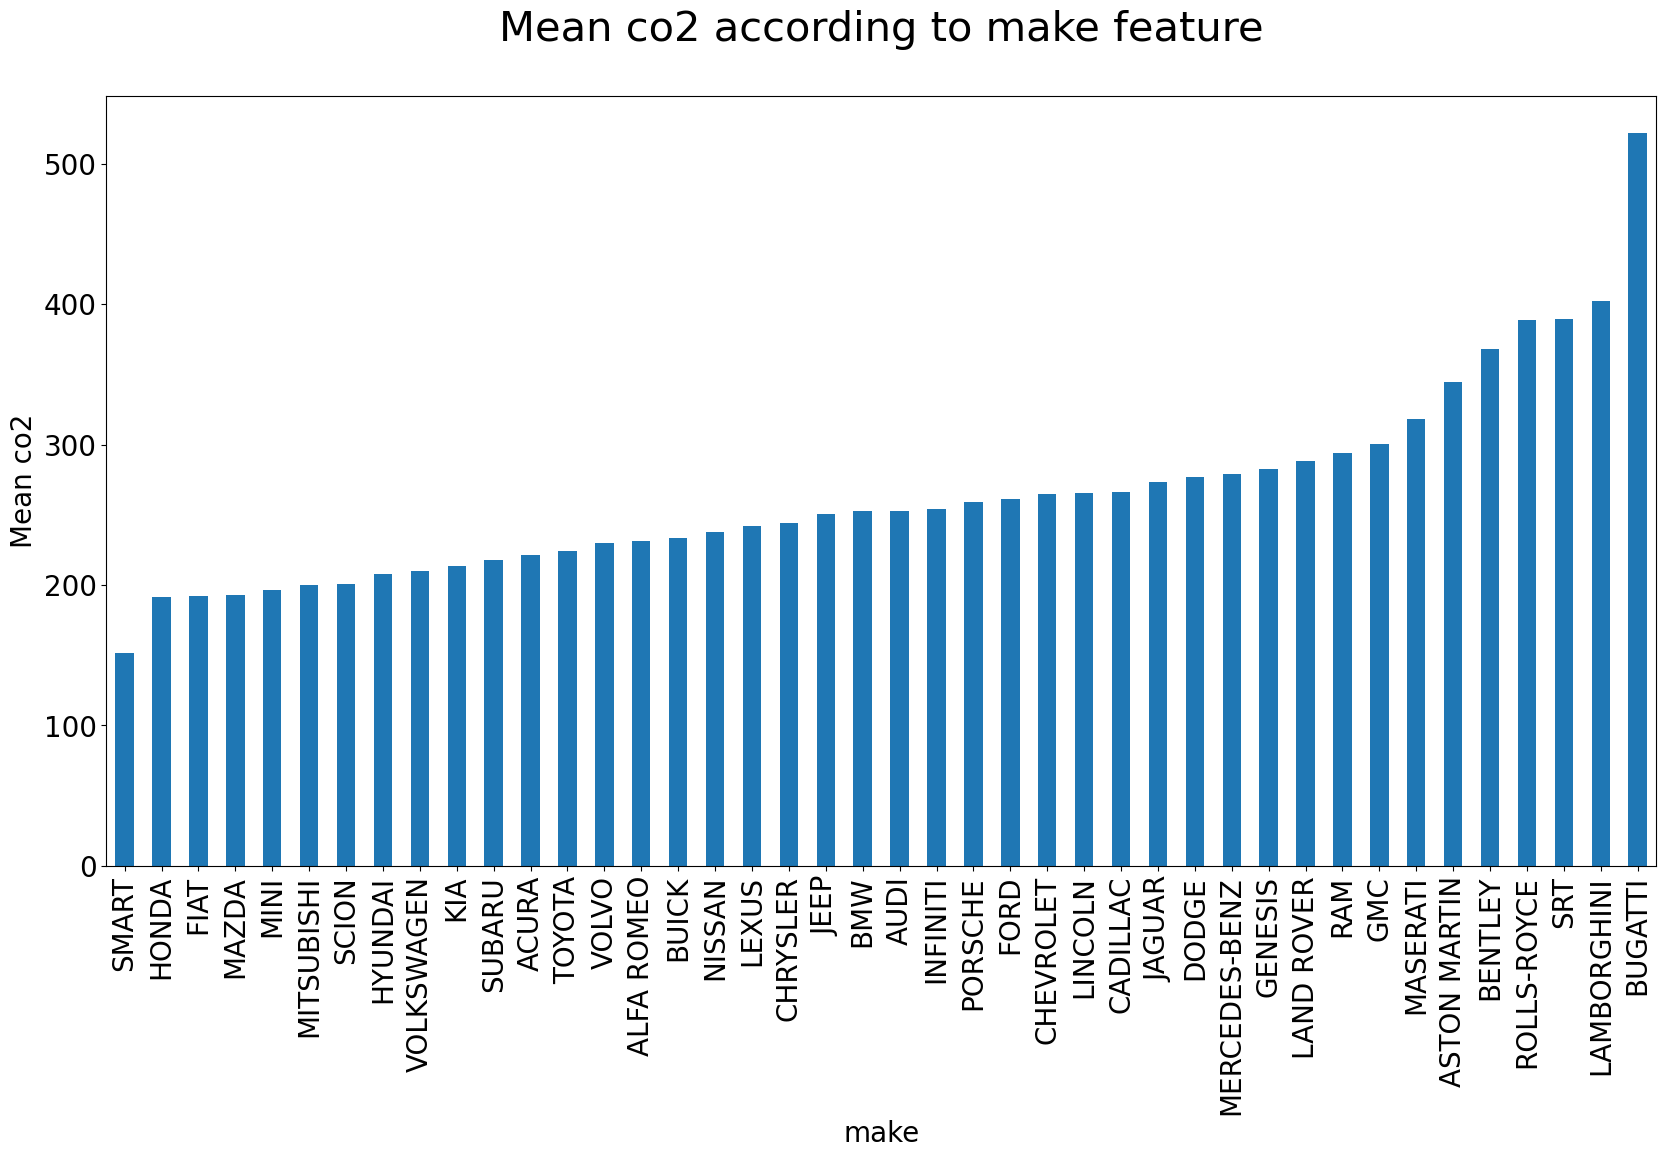

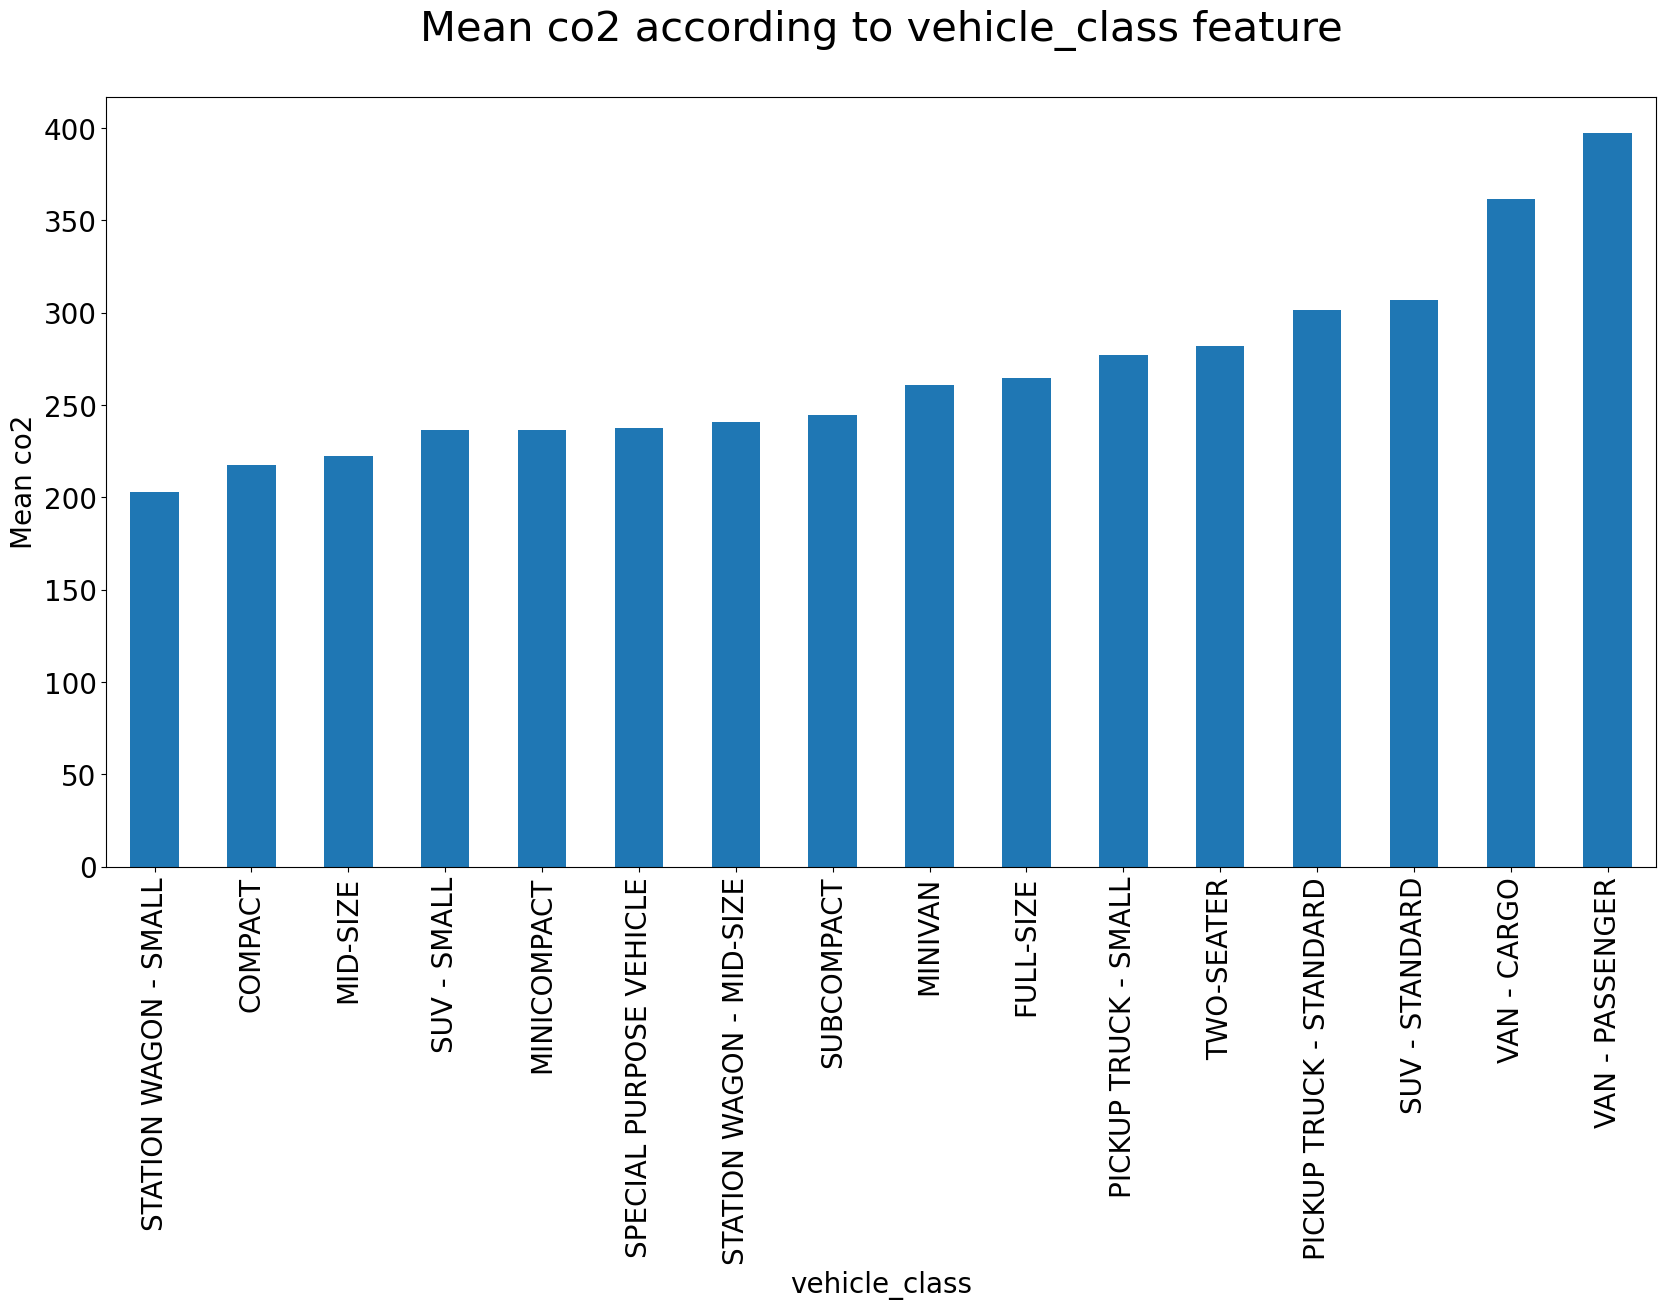

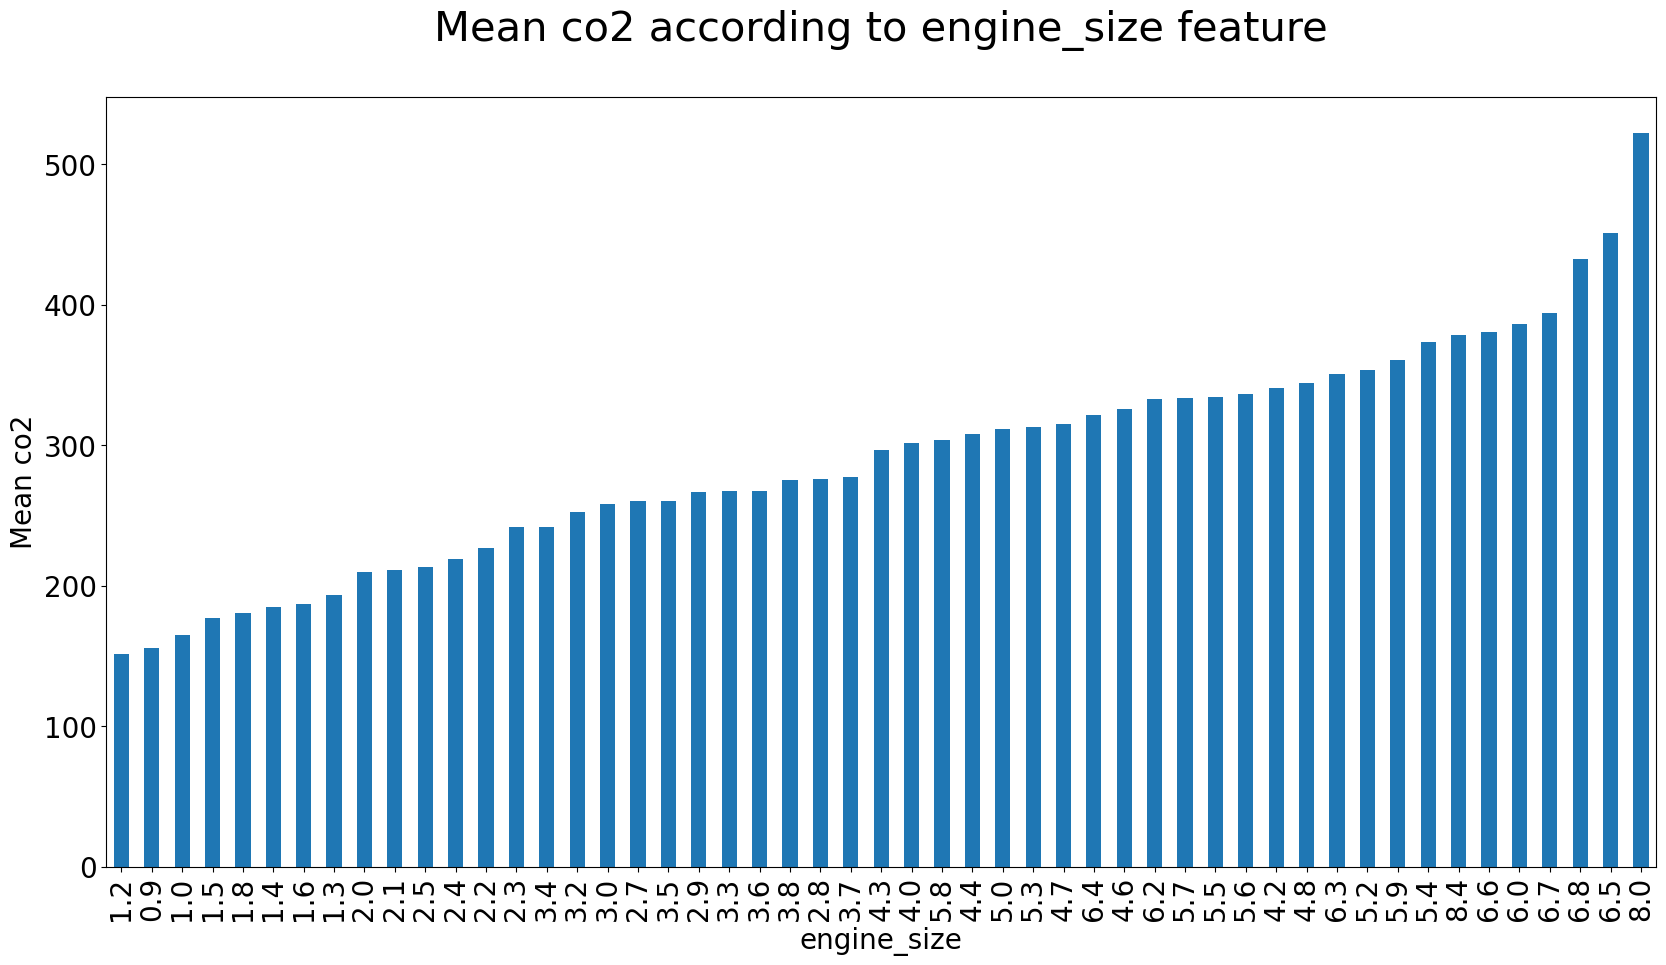

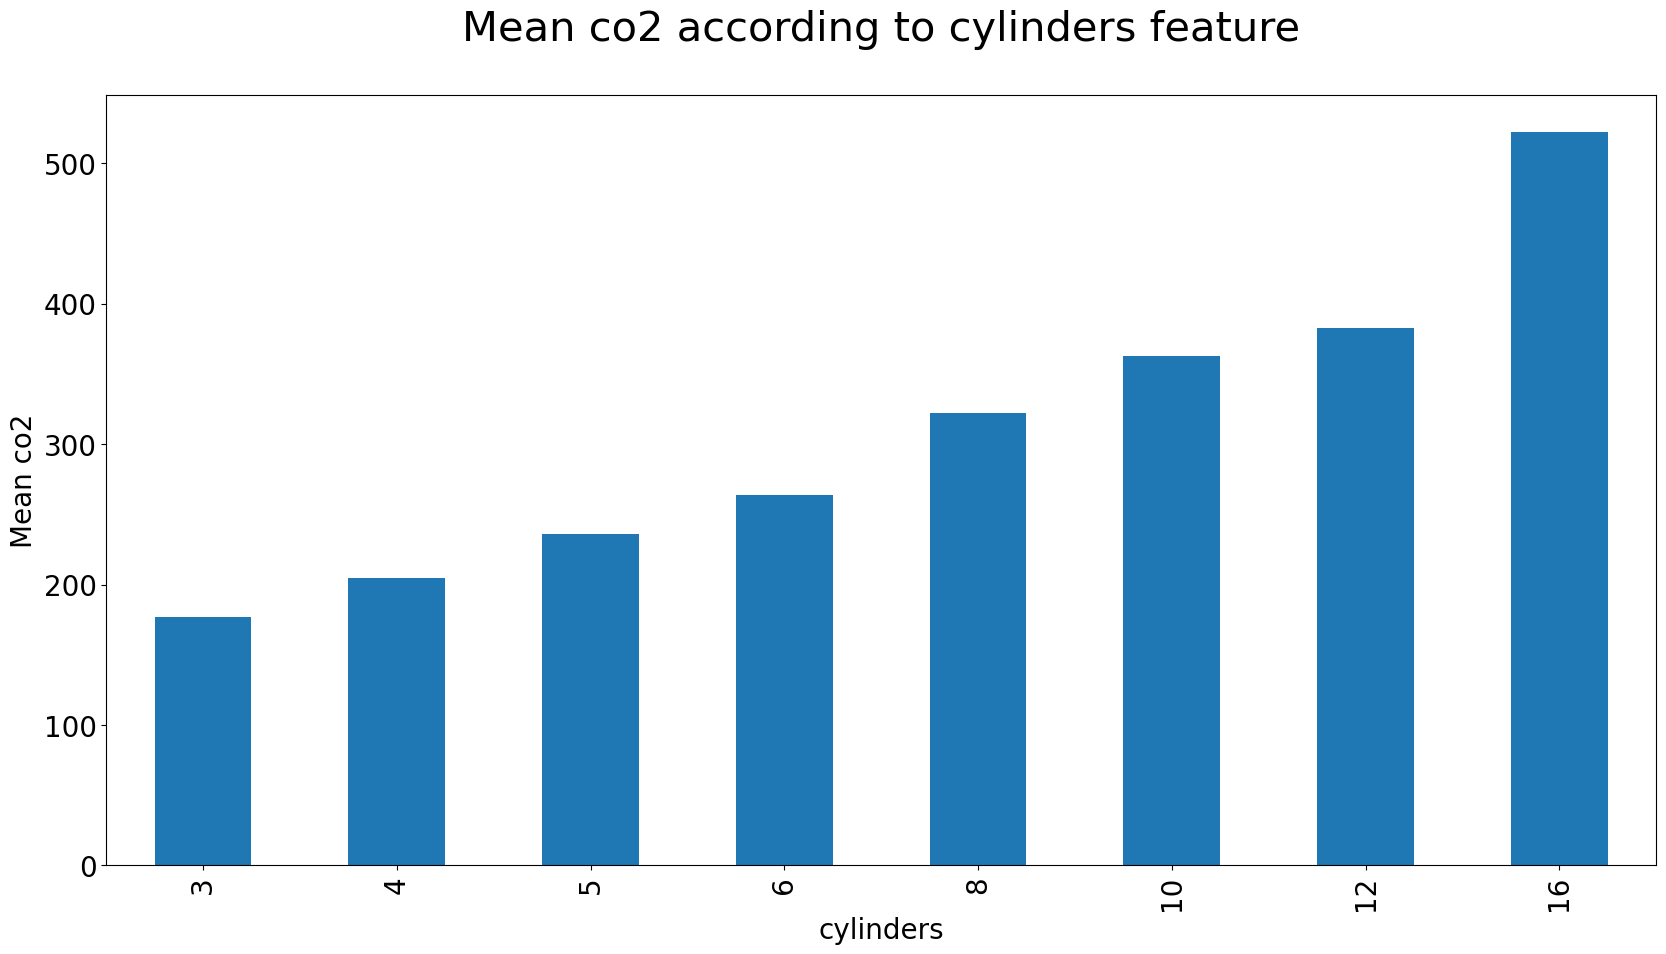

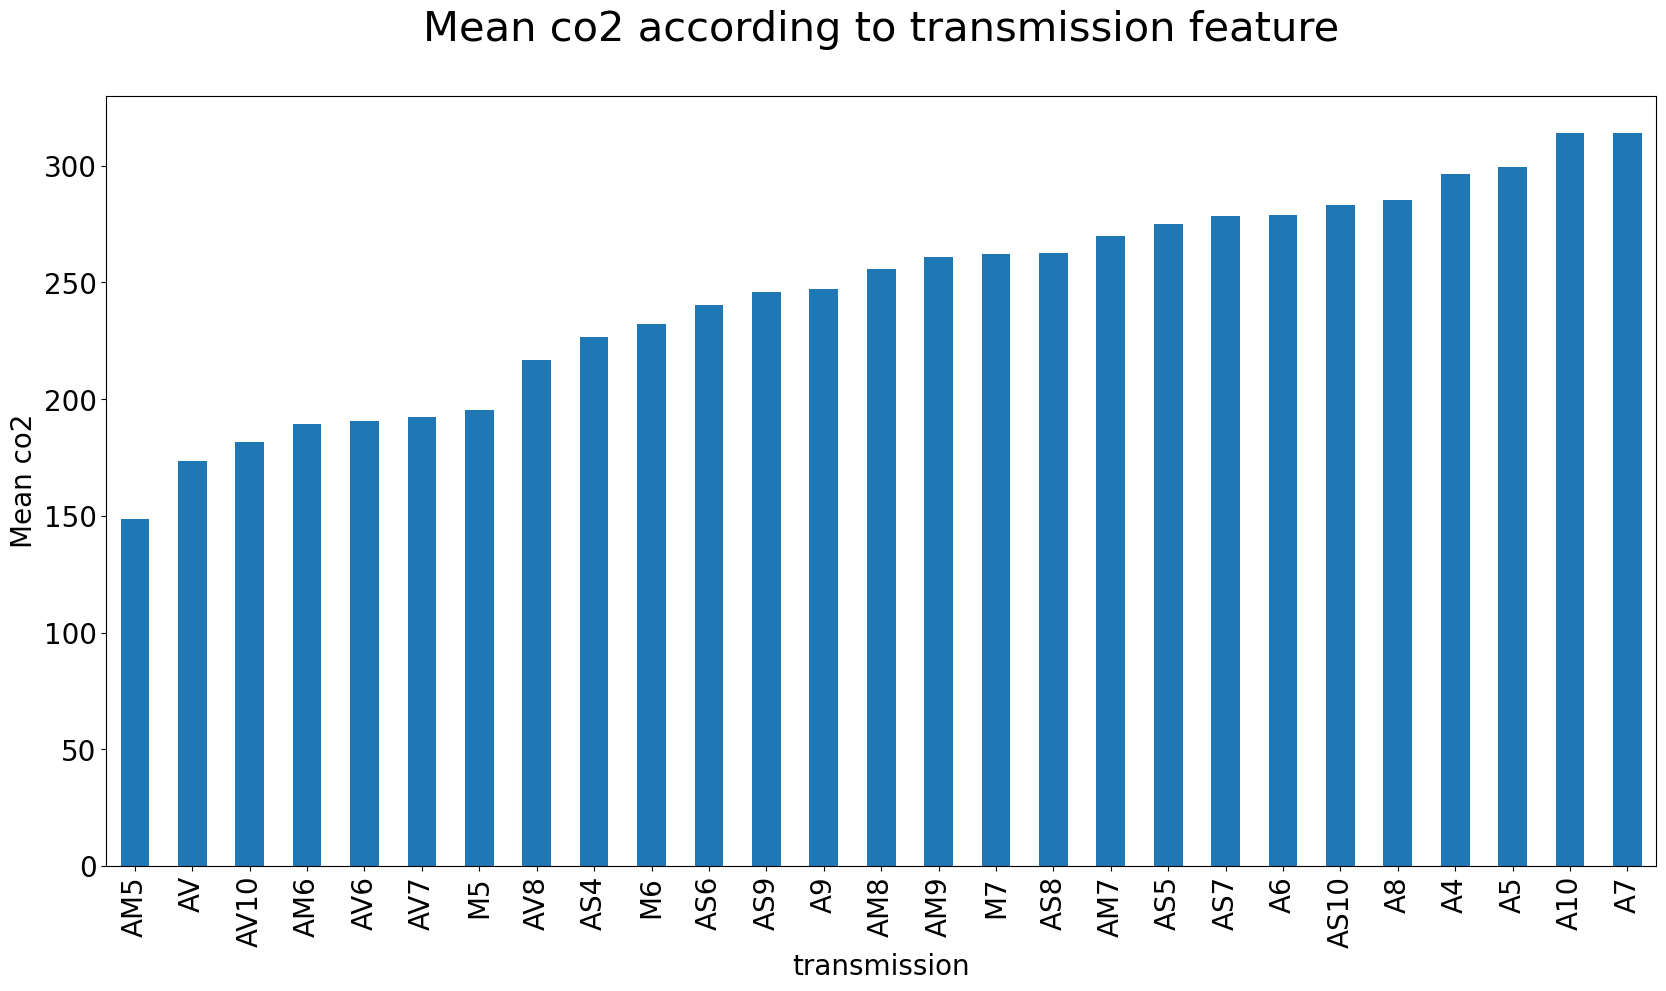

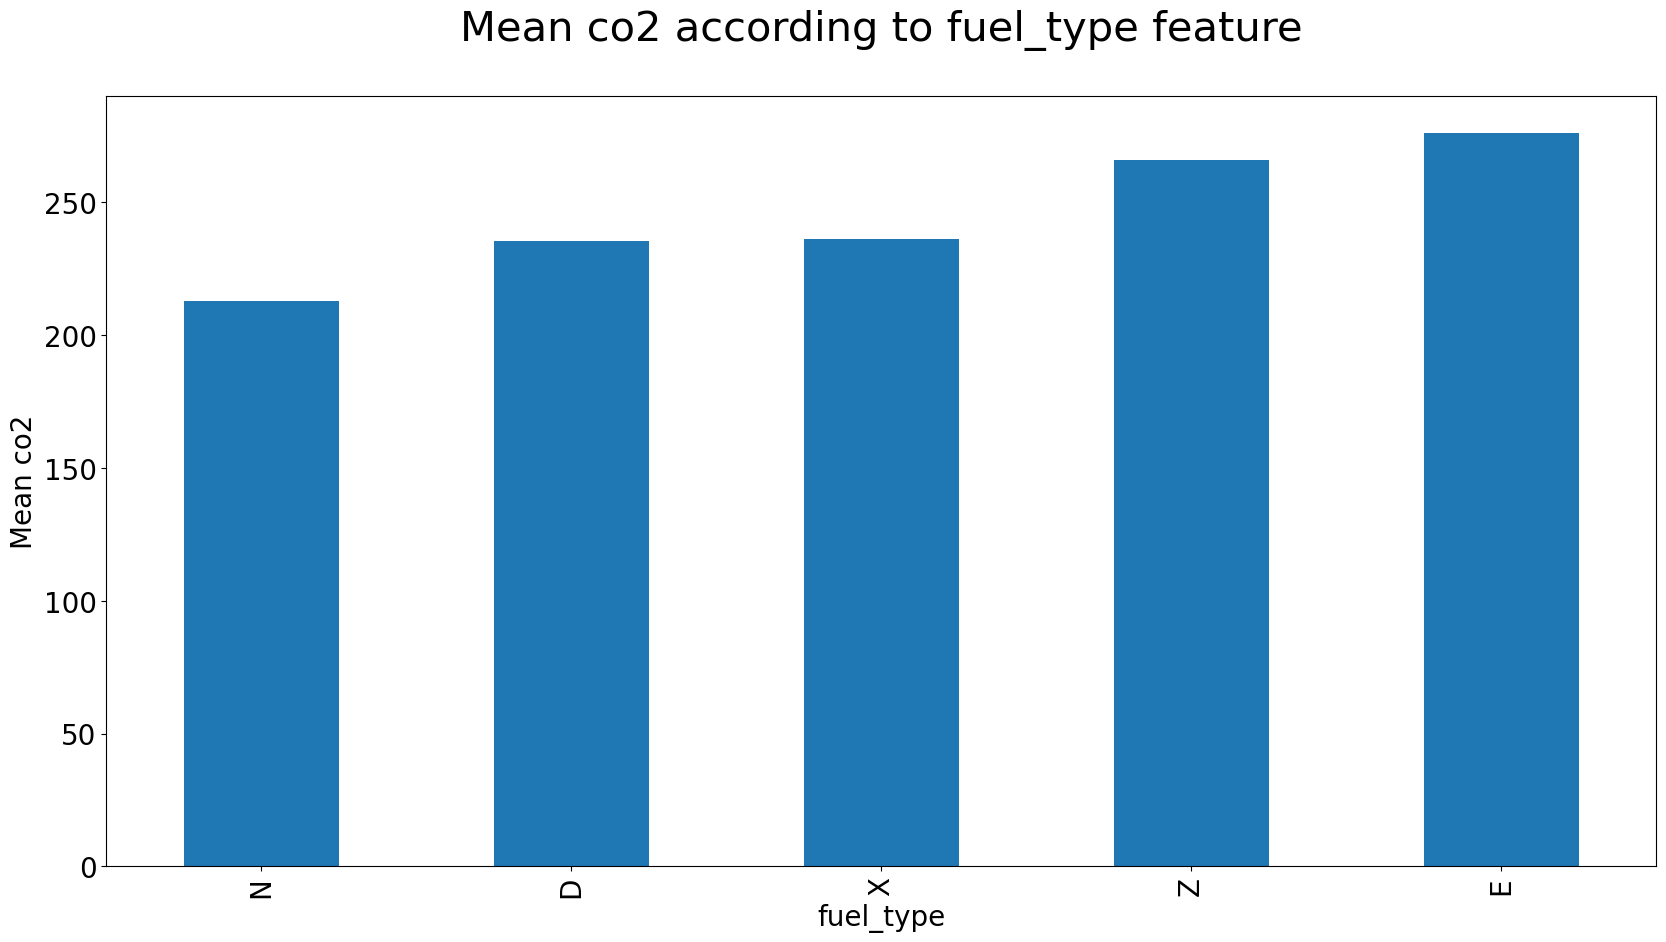

In [149]:
# Feature plots against CO2 emission.

for feature in ['make', 'vehicle_class', 'engine_size', 'cylinders', 'transmission', 'fuel_type']:
    explore_cat_feature(feature)

<Axes: xlabel='cylinders', ylabel='co2'>

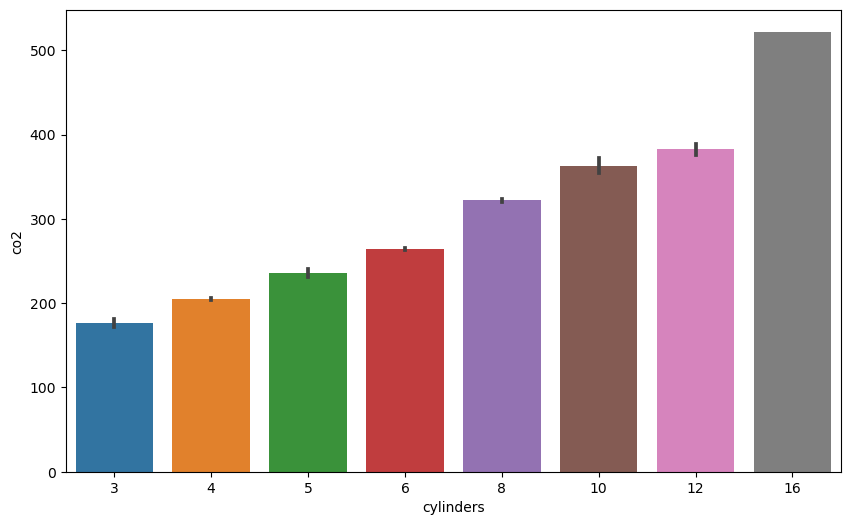

In [150]:
sns.barplot(x='cylinders', y='co2', data=df)

<Axes: xlabel='cylinders', ylabel='engine_size'>

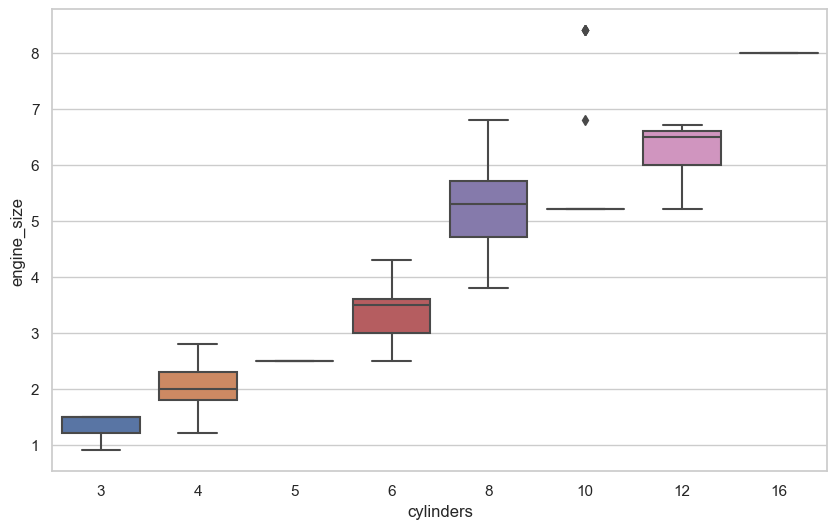

In [294]:
var = 'cylinders'
threshold_4 = 1.2
threshold_6 = 4.4

# Create a copy of the DataFrame to avoid modifying the original data
df4 = df2.copy()

# Remove outliers for Cylinder value 4
df4.loc[(df4[var] == 4) & (df4['engine_size'] < threshold_4), 'engine_size'] = None

# Remove outliers for Cylinder value 6
df4.loc[(df4[var] == 6) & (df4['engine_size'] > threshold_6), 'engine_size'] = None

# Plot the boxplot without outliers
sns.boxplot(data=df4, y='engine_size', x=var)

<Axes: xlabel='cylinders', ylabel='co2'>

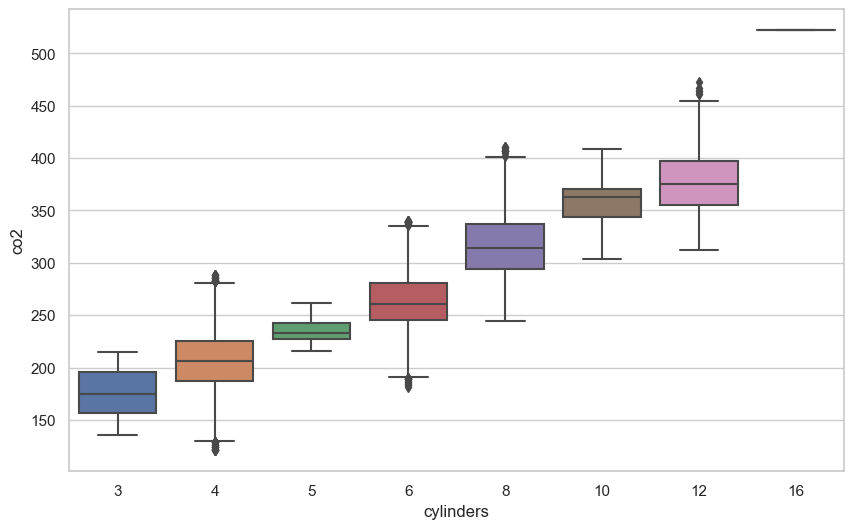

In [295]:
import numpy as np

# Assuming our DataFrame is named df4
var = 'cylinders'
threshold = 3  # You can adjust this threshold based on your requirements

# Create a copy of the DataFrame to avoid modifying the original data
df4_copy = df4.copy()

# Function to calculate modified z-score
def calculate_modified_zscore(series):
    median = series.median()
    median_absolute_deviation = np.median(np.abs(series - median))
    modified_zscores = 0.6745 * (series - median) / median_absolute_deviation
    return np.abs(modified_zscores)

# Apply modified z-score for each group of cylinders
outlier_mask = df4_copy.groupby(var)['co2'].transform(calculate_modified_zscore) > threshold

# Remove outliers
df4_copy.loc[outlier_mask, 'co2'] = None

# Plot the boxplot without outliers
sns.boxplot(data=df4_copy, y='co2', x=var)

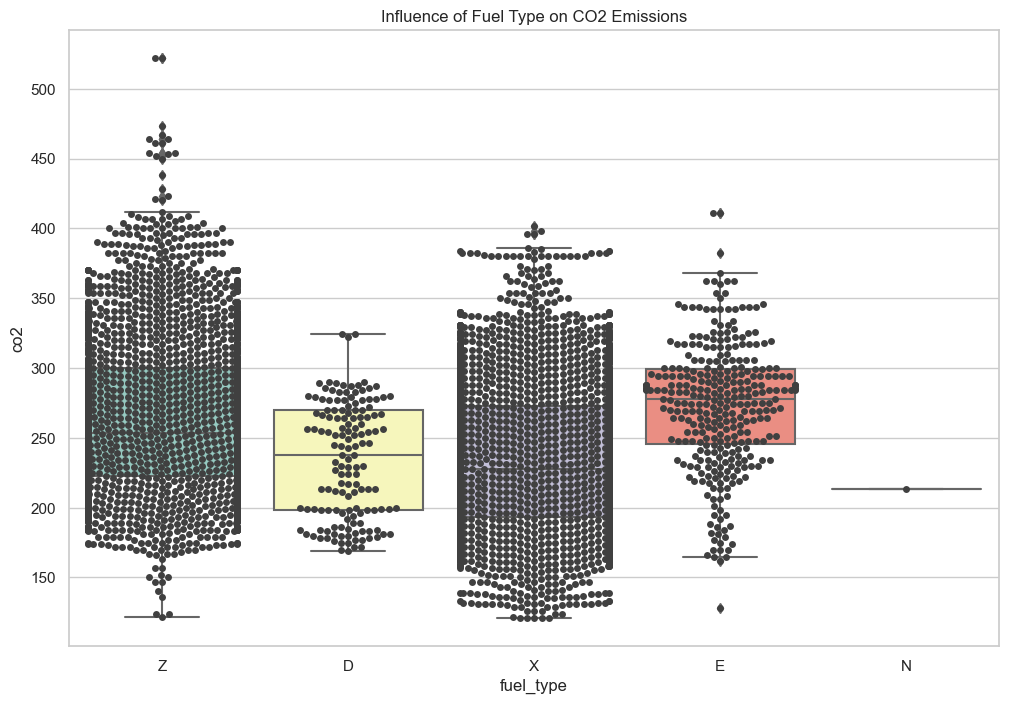

In [296]:
# This is to see the influence of fuel type on the CO2 emissions
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(x='fuel_type', y='co2', data=df4_copy, palette="Set3")
sns.swarmplot(x='fuel_type', y='co2', data=df4_copy, color=".25")

plt.title('Influence of Fuel Type on CO2 Emissions')
plt.show()

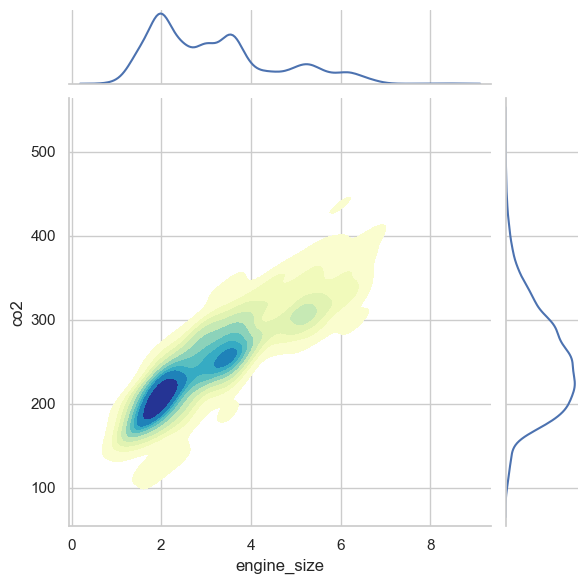

In [323]:
sns.jointplot(data=df2, y='''co2''', x="engine_size",  kind="kde", shade=True,cmap="YlGnBu")

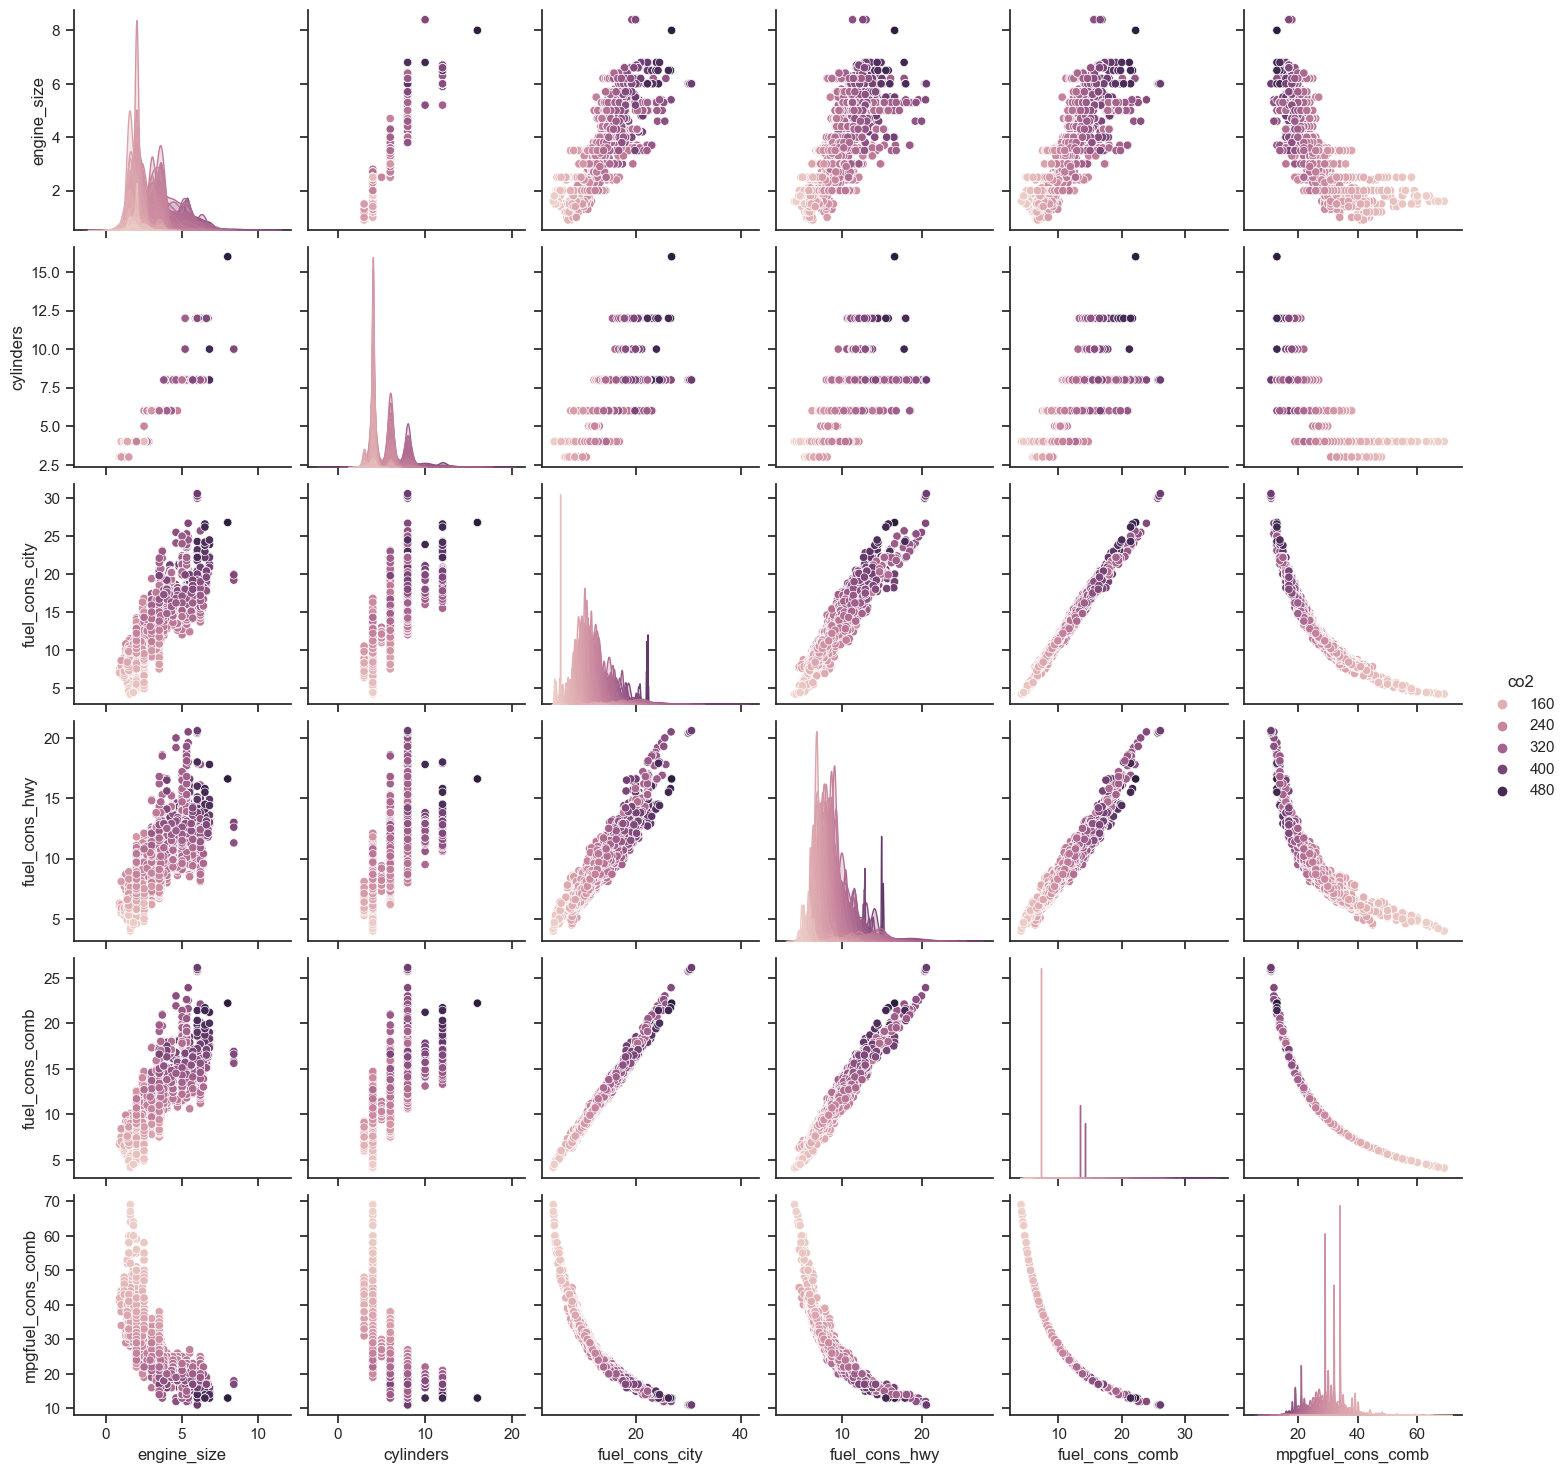

In [291]:
sns.pairplot(df, hue="co2")

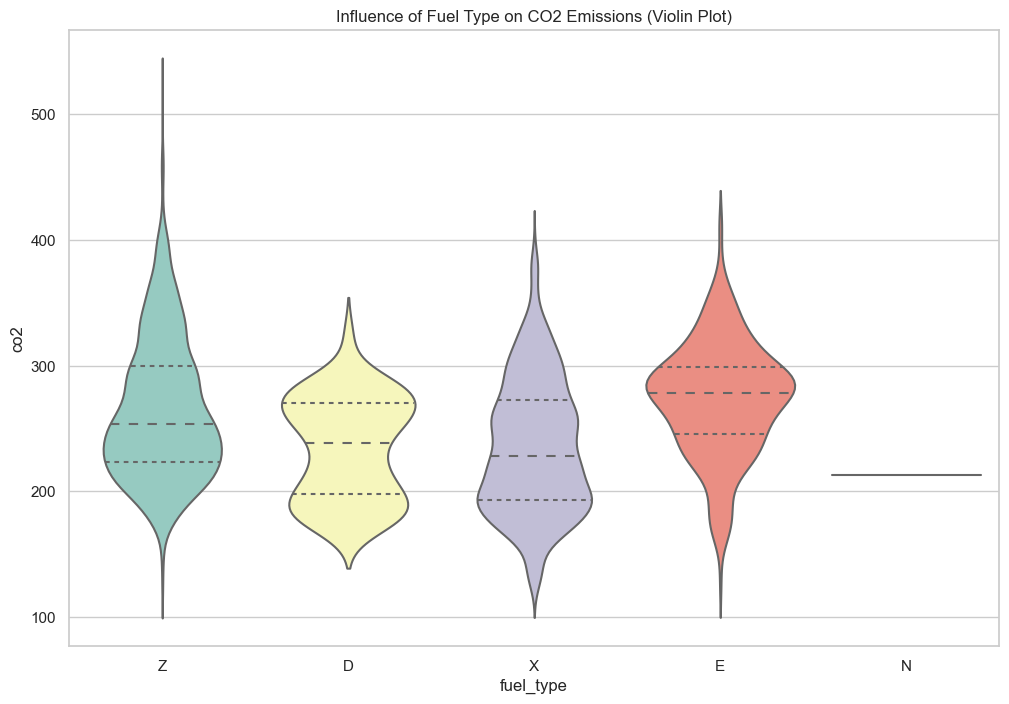

In [297]:
# To visualize the correlation or influence of the fuel type on CO2 emissions, we can create a boxplot or a violin plot to compare the distributions of CO2 emissions for each fuel type

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.violinplot(x='fuel_type', y='co2', data=df4_copy, palette="Set3", inner="quartile")

plt.title('Influence of Fuel Type on CO2 Emissions (Violin Plot)')
plt.show()

In [178]:
# Build a simple Model.

df2 = df.drop(['make', 'model', 'vehicle_class', 'fuel_cons_city', 'transmission', 'fuel_type', 'fuel_cons_hwy', 'mpgfuel_cons_comb'],axis=1)
df2.head()

,engine_size,cylinders,fuel_cons_comb,co2
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [179]:
X = df2.drop(['co2'], axis= 1)
y = df2["co2"]

In [180]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)

In [181]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [182]:
print('Training Accuracy: ', lin_reg.score(X_train, y_train))
print('Testing Accuracy: ', lin_reg.score(X_test, y_test))
# Accuracy in classification
# R2 score in regression (analogous to accuracy) 
# total variance explained by model) / total variance.” 
# So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all.

Training Accuracy:  0.8780095924454142
Testing Accuracy:  0.8810508731496479


In [183]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math
rf = RandomForestRegressor(random_state = 50)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
print('Training Accuracy: ', rf.score(X_train, y_train)*100)
print('Testing Accuracy: ', rf.score(X_test, y_test)*100)
print('Root Mean Squared Error: ', rmse)

Training Accuracy:  98.84001096035702
Testing Accuracy:  98.12428204133658
Root Mean Squared Error:  8.051346858043265


In [184]:
# KNN Regressor.

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
print('Training Accuracy: ', knn.score(X_train, y_train)*100)
print('Testing Accuracy: ', knn.score(X_test, y_test)*100)
print('Root Mean Squared Error: ', rmse)

Training Accuracy:  97.82897124060537
Testing Accuracy:  97.24651313995916
Root Mean Squared Error:  9.754977514921645


In [302]:
# Assuming the DataFrame is named df4_copy
df4_copy['engine_size_filled'] = df4_copy.groupby(['make', 'model'])['engine_size'].transform(lambda x: x.fillna(x.mean()))

# Display the updated DataFrame
print("Updated DataFrame with filled values:")
print(df4_copy)

Updated DataFrame with filled values:
       make        model   vehicle_class  engine_size  cylinders transmission  \
0     ACURA          ILX         COMPACT          2.0          4          AS5   
1     ACURA          ILX         COMPACT          2.4          4           M6   
2     ACURA   ILX HYBRID         COMPACT          1.5          4          AV7   
3     ACURA      MDX 4WD     SUV - SMALL          3.5          6          AS6   
4     ACURA      RDX AWD     SUV - SMALL          3.5          6          AS6   
...     ...          ...             ...          ...        ...          ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL          2.0          4          AS8   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL          2.0          4          AS8   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL          2.0          4          AS8   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD          2.0          4          AS8   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD          2.0          4       

In [303]:
# Assuming your DataFrame is named df4
nan_rows = df4_copy[df4_copy['engine_size'].isna()]

# Display the rows with NaN values in the 'Engine Size(L)' column
print("Rows with NaN values in the 'Engine Size(L)' column:")
print(nan_rows)

Rows with NaN values in the 'Engine Size(L)' column:
               make         model vehicle_class  engine_size  cylinders  \
394            FORD    FIESTA SFE    SUBCOMPACT          NaN          4   
1868  MERCEDES-BENZ  S 400 4MATIC      MID-SIZE          NaN          6   

     transmission fuel_type  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  \
394            M5         X             7.5            5.5             6.6   
1868          AS7         Z            12.6            8.6            10.8   

      mpgfuel_cons_comb    co2  engine_size_filled  
394                  43  152.0                1.24  
1868                 26  248.0                 NaN  


In [305]:
df4_copy['co2'] = df4_copy.groupby('model')['co2'].transform(lambda x: x.fillna(x.mean()))
df4_copy['co2'] = df4_copy.groupby('cylinders')['co2'].transform(lambda x: x.fillna(x.mean()))

df4_copy['engine_size'] = df4_copy['engine_size_filled']
#df4_copy.drop('Engine Size(L)_filled ', axis=1, inplace=True)
df4_copy.dropna(subset=['engine_size'], inplace=True)
df4_copy.isnull().sum()

make                  0
model                 0
vehicle_class         0
engine_size           0
cylinders             0
transmission          0
fuel_type             0
fuel_cons_city        0
fuel_cons_hwy         0
fuel_cons_comb        0
mpgfuel_cons_comb     0
co2                   0
engine_size_filled    0
dtype: int64

In [312]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Assuming our DataFrame is named df4_copy
# Assuming 'CO2 Emissions(g/km)' is the target variable

# Selecting predictors and target variable
X = df4_copy[['cylinders', 'engine_size', 'fuel_type', 'mpgfuel_cons_comb']]
y = df4_copy['co2']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: One-Hot Encoding for 'Fuel Type'
preprocessor = ColumnTransformer(
    transformers=[
        ('fuel_type', OneHotEncoder(), ['fuel_type'])
    ],
    remainder='passthrough'
)

# Linear Regression model in a pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 333.63
R-squared: 0.90


In [315]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Assuming the DataFrame is named df4_copy
# Assuming 'CO2 Emissions(g/km)' is the target variable

# Selecting predictors and target variable
X = df4_copy[['cylinders', 'engine_size', 'fuel_type', 'mpgfuel_cons_comb']]
y = df4_copy['co2']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Preprocessing: One-Hot Encoding for 'Fuel Type'
preprocessor = ColumnTransformer(
    transformers=[
        ('fuel_type', OneHotEncoder(), ['fuel_type'])
    ],
    remainder='passthrough'
)

# Support Vector Machine model in a pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

# Fit the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Results DataFrame:")
print(results)

# Display the evaluation metrics
print(f'\nMean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Results DataFrame:
          Actual   Predicted
6851  280.000000  274.534736
3747  319.104025  350.770537
4272  247.000000  249.600641
840   175.000000  177.638553
6368  261.000000  265.273544
...          ...         ...
2503  242.000000  249.600641
3241  267.000000  266.507849
1547  214.000000  291.523237
2832  179.000000  177.196195
64    292.000000  290.802210

[1257 rows x 2 columns]

Mean Squared Error: 398.01
R-squared: 0.88


In [318]:
# KNN 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your DataFrame is named df4_copy
# Assuming 'CO2 Emissions(g/km)' is the target variable

# Selecting predictors and target variable
X = df4_copy[['cylinders', 'engine_size', 'fuel_type', 'mpgfuel_cons_comb']]
y = df4_copy['co2']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Preprocessing: One-Hot Encoding for 'Fuel Type'
preprocessor = ColumnTransformer(
    transformers=[
        ('fuel_type', OneHotEncoder(), ['fuel_type'])
    ],
    remainder='passthrough'
)

# KNN model in a pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

# Fit the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Results DataFrame:")
print(results)

# Display the evaluation metrics
print(f'\nMean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Results DataFrame:
        Actual  Predicted
3227  198.0000   193.2000
3823  206.0802   206.0802
5577  278.0000   277.6000
5742  226.0000   226.8000
3023  181.0000   183.4000
...        ...        ...
3471  223.0000   219.6000
2377  214.0000   210.8000
1149  354.0000   367.8000
176   340.0000   345.4000
5606  302.0000   298.0000

[1257 rows x 2 columns]

Mean Squared Error: 43.24
R-squared: 0.99


In [319]:
# Decision Trees.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your DataFrame is named df4_copy
# Assuming 'CO2 Emissions(g/km)' is the target variable

# Selecting predictors and target variable
X = df4_copy[['cylinders', 'engine_size', 'fuel_type', 'mpgfuel_cons_comb']]
y = df4_copy['co2']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: One-Hot Encoding for 'Fuel Type'
preprocessor = ColumnTransformer(
    transformers=[
        ('fuel_type', OneHotEncoder(), ['fuel_type'])
    ],
    remainder='passthrough'
)

# Decision Tree model in a pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Fit the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Results DataFrame:")
print(results)

# Display the evaluation metrics
print(f'\nMean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Results DataFrame:
      Actual   Predicted
3004   298.0  331.750000
5971   296.0  298.057143
2395   263.0  262.928571
6020   275.0  274.509434
3417   267.0  263.253968
...      ...         ...
6249   197.0  194.475000
2572   236.0  235.384615
3163   279.0  274.509434
2460   187.0  187.142857
7210   194.0  194.475000

[1257 rows x 2 columns]

Mean Squared Error: 47.24
R-squared: 0.99
